# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Необходимо определить рыночную стоимость объектов недвижимости.\
Наша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Описание данных:**\
`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м),\
`balcony` — число балконов,\
`ceiling_height` — высота потолков (м),\
`cityCenters_nearest` — расстояние до центра города (м),\
`days_exposition` — сколько дней было размещено объявление (от публикации до снятия),\
`first_day_exposition` — дата публикации,\
`floor` — этаж,\
`floors_total` — всего этажей в доме,\
`is_apartment` — апартаменты (булев тип),\
`kitchen_area` — площадь кухни в квадратных метрах (м²),\
`last_price` — цена на момент снятия с публикации
`living_area` — жилая площадь в квадратных метрах (м²),\
`locality_name` — название населённого пункта,\
`open_plan` — свободная планировка (булев тип),\
`parks_around3000` — число парков в радиусе 3 км,\
`parks_nearest` — расстояние до ближайшего парка (м),\
`ponds_around3000` — число водоёмов в радиусе 3 км,\
`ponds_nearest` — расстояние до ближайшего водоёма (м),\
`rooms` — число комнат,\
`studio` — квартира-студия (булев тип),\
`total_area` — общая площадь квартиры в квадратных метрах (м²),\
`total_images` — число фотографий квартиры в объявлении.

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [2]:
#разделила блок загрузки библиотек и датасет
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Построим общую гистограмму для всех числовых столбцов таблицы.

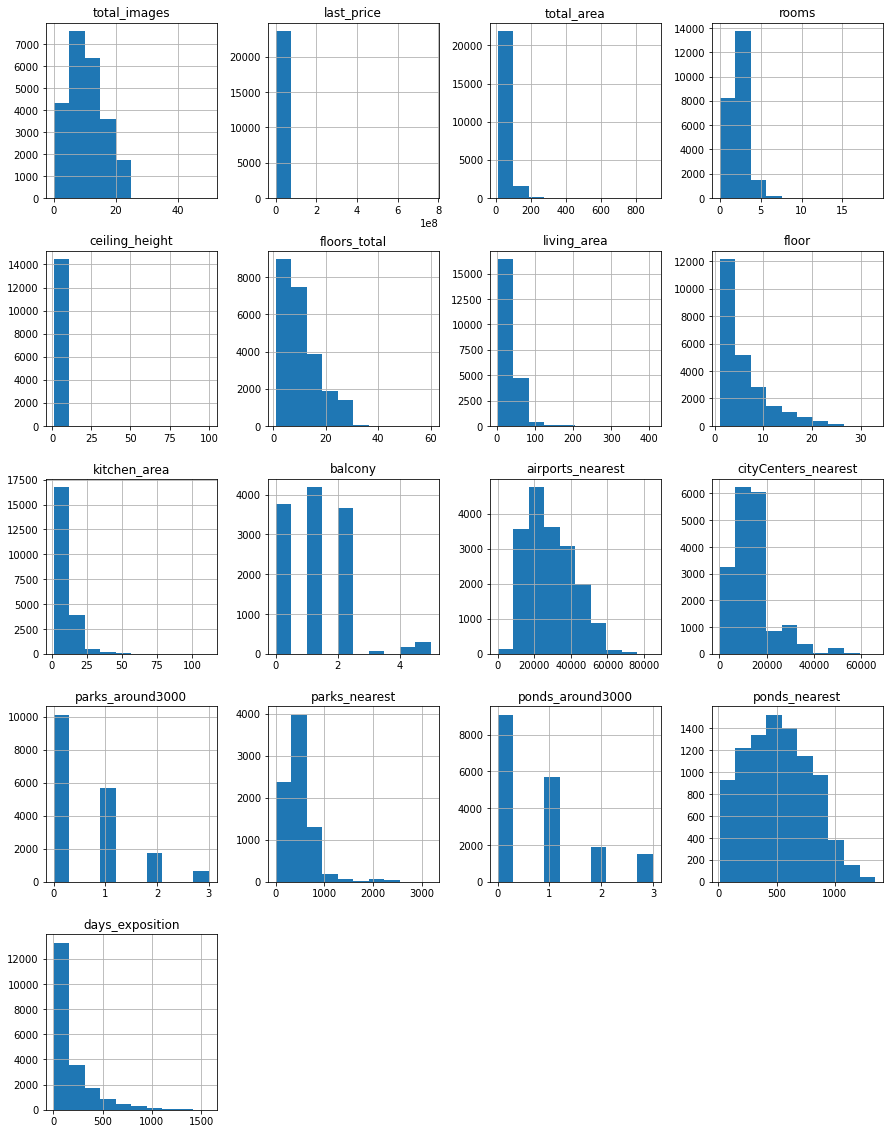

In [5]:
data.hist(figsize=(15, 20));

### Предобработка данных

#### Найдем и изучим пропущенные значения в столбцах

**Определим, в каких столбцах есть пропуски:**

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

**Выявим столбцы с наибольшим % пропущенных значений:**

Рассчитаем долю пропущенных значений в разрезе столбцов:

In [7]:
res_nan = (
    data.isna().mean()
    .reset_index()
)

Переименуем столбцы в таблице `res_nan` и выстроим данные по убыванию % пропущенных значений:

In [8]:
res_nan.columns = ['columns_name', 'percent_nan']
res_nan = res_nan.sort_values(by='percent_nan', ascending=False)

Преобразуем формат выводимых данных в столбце `percent_nan` в %:

In [9]:
res_nan['percent_nan'] = ["{:.2%}".format(i) for i in res_nan['percent_nan']]

Выведем список столбцов в разрезе % от общего количества пропущенных значений:

In [10]:
res_nan

,columns_name,percent_nan
9,is_apartment,88.29%
18,parks_nearest,65.91%
20,ponds_nearest,61.56%
13,balcony,48.61%
5,ceiling_height,38.80%
15,airports_nearest,23.38%
16,cityCenters_nearest,23.29%
19,ponds_around3000,23.28%
17,parks_around3000,23.28%
21,days_exposition,13.42%


**Вывод:**\
Наибольшее количество пропущенных значений выявлено в столбцах:
* апартаменты (is_apartment) - 88 % пропущенных значений,
* расстояние до ближайшего парка (parks_nearest) - 66%,
* расстояние до ближайшего водоёма (ponds_nearest) - 62%,
* балконы (balcony) - 48%,
* высота потолков (ceiling_height) - 39%

In [11]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

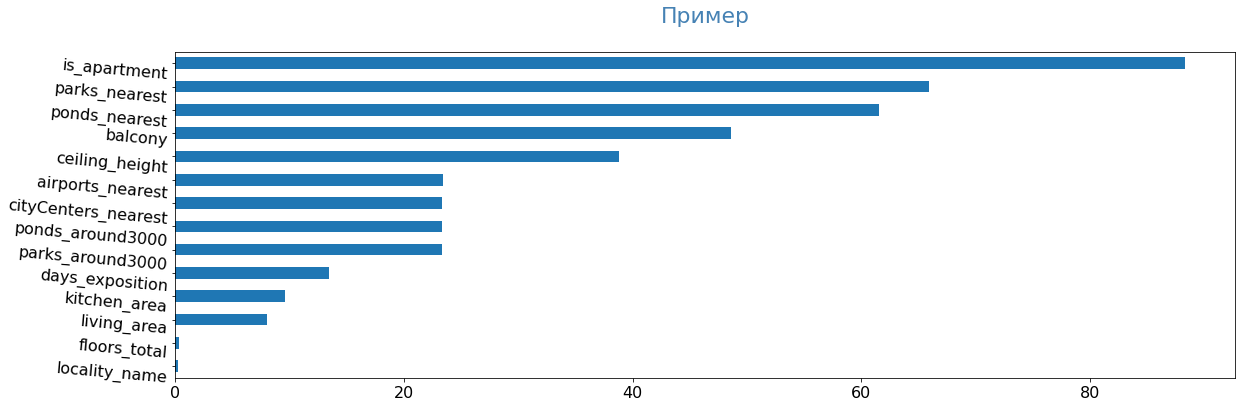

In [12]:
pass_value_barh(data)

**Заполним пропущенные значения там, где это возможно**:

1. Сколько дней было размещено объявление (от публикации до снятия) `days_exposition`\
Предполагаемая причина отсутствия данных:
   - квартира не продана,
   - сделка о покупке недвижимости оформлялась не через сайт (e.g. Дом.клик)\   

Пропуски в столбце говорят нам, что квартиры еще не проданы → оставляем пропущенные значения.

In [14]:
data['days_exposition'] = data['days_exposition'].fillna(0)

In [15]:
data['days_exposition'].isna().sum()

0

2. Наличие балконов `balcony`:\
Возможная причина отсутствия данных: количество балконов не указано, т.к. они отсутствуют в квартире.\
Решение: Заменим данные пропуски на ноль(0)

In [16]:
data['balcony'] = data['balcony'].fillna(0)

3. Расстояние до ближайшего водоёма, метры (ponds_nearest):\
Возможная причина отсутствия данных:\
Столбцы `ponds_around3000` и `ponds_nearest` взаимосвязаны.\
Расстояние до ближайшего водоема указывается в метрах => делаем допущение, если в радиусе 3 км водоемов нет, то указывать расстояние в _метрах_ до блжайшего водоема _бессмысленно_.\
Решение:\
если в радиусе 3 км `ponds_around3000` водоемов нет/информация отсутствует => расстояние до ближайшего водоема = 0.\

In [17]:
data.loc[((data['ponds_around3000'].isna()) | (data['ponds_around3000'] == 0)) 
         & (data['ponds_nearest'].isna()),'ponds_nearest'] = 0

Аналогично заменим пустые значения в столбце `ponds_around3000` если `ponds_nearest` = 0:

In [18]:
data.loc[(data['ponds_nearest'] == 0) & (data['ponds_around3000'].isna()), 'ponds_around3000'] = 0

4. Расстояние до ближайшего парка, метры (parks_nearest):\
Возможная причина отсутствия данных:\
Столбцы parks_around3000 и parks_nearest взаимосвязаны.\
Расстояние до ближайшего парка указывается в метрах => делаем допущение, если в радиусе 3 км парков нет, то указывать расстояние в _метрах_ до блжайшего парка _бессмысленно_.\
Решение:\
если в радиусе 3 км `parks_around3000` парков нет/информация отсутствует => расстояние до ближайшего парка = 0.\

In [19]:
data.loc[((data['parks_around3000'].isna()) | (data['parks_around3000'] == 0)) 
         & (data['parks_nearest'].isna()),'parks_nearest'] = 0

Аналогично заменим пустые значения в столбце parks_around3000 если parks_nearest = 0:

In [20]:
data.loc[(data['parks_nearest'] == 0) & (data['parks_around3000'].isna()), 'parks_around3000'] = 0

5. Апартаменты `is_apartment`:
Продавцы не заполнили столбец, т.к. скорее всего квартиры не относились к апартаментам.\
Владельцы апартаментов заполнили данный признак, чтобы отсеять звонки покупателей, не рассматривающих апартаменты для приобретения.\
Апартаменты являются нежилой недвижиостью, в них нельзя получить постоянную регистрацию.
Вывод: продавец заинтересован в проставлении критерия "апартаменты", если квартира является нежилой недвижимостью.

In [21]:
#Столбец имеет булев тип.
data['is_apartment'] = data['is_apartment'].fillna(False)
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          9195
floors_total              86
living_area             1903
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area            2278
balcony                    0
locality_name             49
airports_nearest        5542
cityCenters_nearest     5519
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition            0
dtype: int64

6.  Расстояние до ближайшего аэропорта в метрах (м):
23% значений пропущено\
Для заполнения пропусков необходимо:
    1. устранить неявные дубликаты в наименованиях населенных пунктов,
    2. для расчета среднего расстояния до аэропорта убрать пропущенные значения,\
    рассчитать существенность отклонения среднего расстояния до аэропорта от медианного в разрезе location.
    3. заполнить пропуски в столбце `airports_nearest`

А. Устраним неявные дубликаты в наименованиях населенных пунктов:

Найдем уникальные значения в столбце `locality_name`:

In [22]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Устраним неявные дубликаты в наименованиях городов:
* создадим функцию `city_reduction`, которая оставляет только наименование населенного пункта без категорий: город, деревня, село и пр.
* добавим в таблицу с анализируемыми данными столец `city_name`,
* пропущенные данные в столбце `locality_name` заменим на значение _unknown_. Количество пропущенных значений несущественное (49 шт), но пока удалять не будем, проанализируем в следующих шагах,
* поместим в столбец `city_name` скорректированные с помощью функции  `city_reduction` названия населенных пунктов.

In [23]:
word_list = ['посёлок городского типа', 'поселок городского типа', 'поселок', 'посёлок', 
             'городской посёлок', 'городской поселок', 'деревня', 'село']

def city_reduction(row):
    for elem in word_list:
        elem_position = len(elem)+1
        if elem in row[0:elem_position]:
            return row[elem_position:]
    return row

In [24]:
data['locality_name'] = data['locality_name'].fillna('unknown')

In [25]:
data['city_name'] = data['locality_name'].apply(city_reduction)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,city_name
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0,Санкт-Петербург
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,Шушары
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург


_Вывод:_ \
удалены неявные дубликаты в наименованиях населенных пунктов.

In [26]:
# check
data['city_name'].nunique()

312

В. Для расчета среднего расстояния до аэропорта уберем пропущенные значения:

Создадим таблицу `data_avg`, в которой отсутствуют пропущенные значения в столбце `airports_nearest`

In [27]:
data_avg = (
data
    .query('~airports_nearest.isna() and airports_nearest != 0')
    .pivot_table(index='city_name', values='airports_nearest', aggfunc=['median', 'mean'])
)

Рассчитаем отклонения среднего расстояния до аэропорта от медианного в разрезе city_name:

Уберем мультииндекс в pivot table, переименовав столбцы таблицы `data_avg`:

In [28]:
data_avg.columns=['airports_med', 'airports_mean']

Добавим столбец `variation` с отклонением медианного значения расстояния до аэропорта от среднего:

In [29]:
data_avg['variation'] = data_avg['airports_med'] - data_avg['airports_mean']

Определим % отклонения медианного значения от среднего как отношения отклонения к среднему значению.\
Добавим столбец `percent` с рассчитанными данными и преобразуем их в % формат:

In [30]:
data_avg['percent'] = data_avg['variation'] / data_avg['airports_mean']
data_avg['percent'] = ["{:.0%}".format(i) for i in data_avg['percent']]

Преобразуем данные в остальных столбцах в формат int:

In [31]:
data_avg['airports_med'] = data_avg['airports_med'].astype('int')
data_avg['airports_mean'] = data_avg['airports_mean'].astype('int')
data_avg['variation'] = data_avg['variation'].astype('int')

Уберем мультииндекс и выведем таблицу с сортировкой процентов по убыванию:

In [32]:
data_avg = data_avg.reset_index()
data_avg.sort_values(by='percent', ascending=False)
data_avg.head()

,city_name,airports_med,airports_mean,variation,percent
0,unknown,22041,24572,-2531,-10%
1,Александровская,12896,12896,0,0%
2,Белоостров,57769,57769,0,0%
3,Зеленогорск,72282,73300,-1018,-1%
4,Колпино,26232,26375,-143,-1%


_Вывод:_ \
Отсутствуют существенные отклонения между медианными и средними значениями для `airports_nearest`.

<a id="airports_nearest"></a>
С. Заполним пропуски в столбце `airports_nearest`

Среднее расстояние до аэропорта необходимо рассчитывать в рамках одной локации (e.g. Санкт-Петербург, Гатчина и пр.).\
С помощью цикла _for_ определим среднее расстояние до метро по квартирам, в которых:\
* не заполнен столбец `airports_nearest`,
* `airports_nearest` == 0. Пояснение: расстояние до аэропорта указывается в _метрах_. В Санкт-Петербурге и Лен.области **отсутствуют** жилые комплексы, расстояние от которых до аэропорта < 1 метра.

Опиание цикла:
- для расчета среднего расстояния до аэропорта исключаем:
    - расстояние до аэропорта == 0 метров,
    - расстояние до аэрпорта не заполнено.
- вычислим локации, для которых расстояние до аэропорта не заполнено _во всех объявлениях_ по данному населенному пункту:
    - Функция для одной строки

Создадим словарь, который содержит среднее расстояния до аэропорта разрезе населенных пунктов:

In [33]:
airprt_distnce_dict = data_avg.set_index('city_name')['airports_mean'].to_dict()
airprt_distnce_dict

{'unknown': 24572,
 'Александровская': 12896,
 'Белоостров': 57769,
 'Зеленогорск': 73300,
 'Колпино': 26375,
 'Красное Село': 26595,
 'Кронштадт': 67469,
 'Левашово': 52693,
 'Лисий Нос': 55302,
 'Ломоносов': 48308,
 'Металлострой': 25726,
 'Молодёжное': 84430,
 'Мурино': 51553,
 'Павловск': 21053,
 'Парголово': 53994,
 'Песочный': 54565,
 'Петергоф': 40184,
 'Петро-Славянка': 20605,
 'Понтонный': 30581,
 'Пушкин': 16447,
 'Репино': 62293,
 'Санкт-Петербург': 28047,
 'Сапёрный': 34142,
 'Сестрорецк': 56640,
 'Стрельна': 28148,
 'Усть-Ижора': 26510,
 'Шушары': 16061,
 'Щеглово': 61908}

Создадим функцию `airport_avg`, котоая определяет среднее расстояние до аэропорта по населенному пункту:

In [34]:
def airport_avg(row):
    airport = row['airports_nearest']
    location = row['city_name']
    if airport == 0 or pd.isna(airport):
        for city, distance in airprt_distnce_dict.items():
            if city == location:
                return distance
    return airport        

В исходой таблице `data` добавим столбец `airport_meters`.\
В столбце заменены отсутствующие значения расстояния до аэропорта на средние по каждому населенному пункту:

In [35]:
data['airport_meters'] = data.apply(airport_avg, axis=1)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,city_name,airport_meters
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,0.0,Санкт-Петербург,18863.0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,False,...,посёлок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,Шушары,12817.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург,21741.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,False,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург,28098.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург,31856.0


Проверим сколько незаполненных значений `airports_meters` осталось:

In [36]:
data['airport_meters'].isna().sum()

4829

Выявим населенные пункты, по которым `airport_meters` осталось незаполненным.\
Выведем первые 15 значений:

In [37]:
no_airprt_meters = (
    data
    .query('airport_meters.isna()')
    .pivot_table(index='city_name', values='locality_name', aggfunc='count')
    .reset_index()
    .sort_values(by='locality_name', ascending=False)
    .head(15)
)
no_airprt_meters

,city_name,locality_name
96,Кудрово,472
31,Всеволожск,398
39,Гатчина,307
32,Выборг,237
139,Новое Девяткино,144
203,Сертолово,142
77,Кириши,125
17,Бугры,114
207,Сланцы,112
30,Волхов,111


Выясним причину пропущенных значений после отработки функции `airports_avg`:
>сопоставим количество незаполненных записей в `airport_meters` с общим количеством объявлений по населенному пункту `city_name`

In [38]:
total_rec = (
    data
    .query('city_name == ["Кудрово", "Всеволожск", "Гатчина", "Выборг"]')
    .pivot_table(index='city_name', values='last_price', aggfunc='count').
    reset_index()
)
total_rec

,city_name,last_price
0,Всеволожск,398
1,Выборг,237
2,Гатчина,307
3,Кудрово,472


Сопоставим количество незаполненных записей в `airport_meters` с общим количеством объявлений по населенному пункту `city_name`:

In [39]:
no_airprt_meters.merge(total_rec)

,city_name,locality_name,last_price
0,Кудрово,472,472
1,Всеволожск,398,398
2,Гатчина,307,307
3,Выборг,237,237


**Вывод:**\
Оставшиеся пропущенные значения в столбце `airport_meters` обусловлены тем, что по ряду населенных пунктов по всем объявлениям отсутствует информация о расстояние до аэропорта =>\
Нет информации для расчета среднего расстояния

7.  Расстояние до центра города в метрах (м) `cityCenters_nearest`:\
23% значений пропущено.\
Выявим для каких населенных пунктов не указано расстояние до центра.
_Гипотеза:_ расстояние до центра указывается только для г.Санкт-Петербург

Узнаем количество пропущенных значений для столбца `cityCenters_nearest` по городу Санкт-Петербург:

In [40]:
data.query('cityCenters_nearest.isna() and city_name == "Санкт-Петербург"')['cityCenters_nearest'].isna().sum()

61

<a id="cityCenters_nearest"></a>
>Гипотеза подтверждена:\
    в 90% случаев расстояние до центра не указано для населенных пунктов Лен.области.\
Вероятная причина:\
    для населенных пунктов в Лен.области расстояние до центра не является критически важным. Вероятнее, покупатели приобретают квартиры в Лен.области для отдыха от городкой суеты.

Заполним пропуски в столбце `cityCenters_nearest` для г. Санкт-Петербург медианными значениями:

In [41]:
data.query('city_name == "Санкт-Петербург"')['cityCenters_nearest'].describe() 

count    15660.000000
mean     11601.291571
std       4842.035279
min        181.000000
25%       8327.000000
50%      12244.500000
75%      14943.000000
max      29493.000000
Name: cityCenters_nearest, dtype: float64

In [42]:
data.loc[(data['city_name'] == 'Санкт-Петербург') & (data['cityCenters_nearest'].isna()), 'cityCenters_nearest'] = \
data.loc[(data['city_name'] == 'Санкт-Петербург') & (~data['cityCenters_nearest'].isna()), 'cityCenters_nearest'].median()

Для населенных пунктов Лен.области установим `cityCenters_nearest` == 0:

In [43]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0)

8. Площадь кухни в квадратных метрах (м²):\
10% пропущенных значений.

Рассчитаем коэффициент Пирсона находят методом _corr()_:

In [44]:
data['kitchen_area'].corr(data['total_area'])

0.6091211711198318

Корреляция в 0.61 говорит о наличии связи, однако не слишком сильной. Корреляция в данном случае положительная:\
с ростом первой величины растёт вторая

Для всех студий заменим пропущенные значения на ноль:

In [45]:
data.loc[(data['rooms'] == 0) & (data['kitchen_area'].isna()), 'kitchen_area'] = 0

In [46]:
#check
(data.query('rooms == 0')['kitchen_area'].isna().sum())

0

Для пустых значений в столбце `kitchen_area` рассчитаем площадь кухни как 90% общей площади - жилая площадь:

In [47]:
for room in data['rooms'].unique():
    data.loc[(data['rooms'] == room) & data['kitchen_area'].isna(), 'kitchen_area'] = \
    (data['total_area'] * 0.9) - data['living_area']

Оставшиеся пустые значения заменим средним размером кухни у квартир c одинаковым параметром _число комнат_:

In [48]:
kitchen_not_nan = (
    data
    .query('~kitchen_area.isna() and (kitchen_area < living_area) and ((kitchen_area + living_area) <= total_area)')
)

In [49]:
kitchen_area_list = {}
for i in kitchen_not_nan['rooms'].unique():
    kitchen_area_median = kitchen_not_nan.loc[(kitchen_not_nan['rooms'] == i, 'kitchen_area')].median()
    total_area_median = kitchen_not_nan.loc[(kitchen_not_nan['rooms'] == i, 'total_area')].median()
    kitchen_area_avg = kitchen_area_median / total_area_median
    kitchen_area_list[i] = kitchen_area_avg.round(2)

kitchen_area_list

{3: 0.13,
 1: 0.25,
 2: 0.16,
 4: 0.11,
 5: 0.11,
 6: 0.11,
 0: 0.0,
 11: 0.07,
 7: 0.09,
 8: 0.11,
 14: 0.07,
 10: 0.07,
 15: 0.17,
 9: 0.05,
 19: 0.07,
 16: 0.05,
 12: 0.12}

In [50]:
for room, percent in kitchen_area_list.items():
    data.loc[(data['rooms'] == room) & data['kitchen_area'].isna(), 'kitchen_area'] = \
    data['total_area'] * percent

In [52]:
data['kitchen_area'].isna().sum()

0

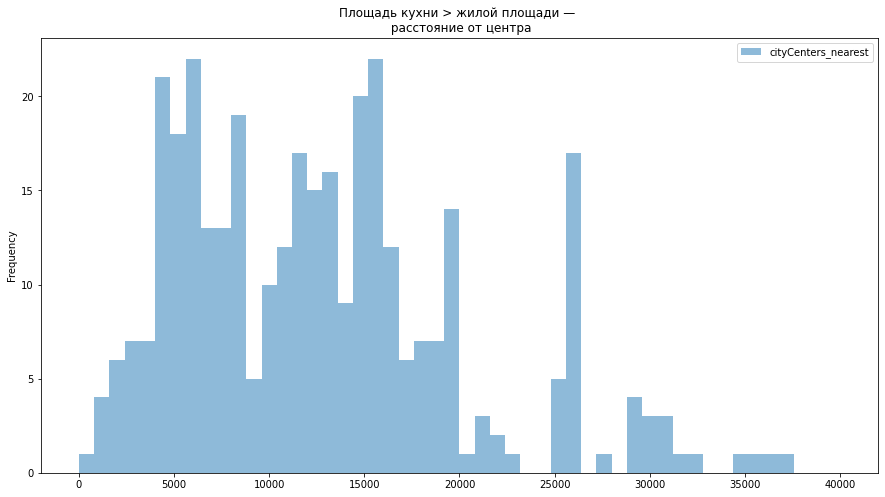

In [53]:
(
    data
    .query('kitchen_area > living_area and kitchen_area != 0 and cityCenters_nearest != 0')
    .plot(kind='hist',y='cityCenters_nearest', x='kitchen_area', alpha=0.5, figsize=(15,8), range=(1, 40000), bins=50)
)
plt.title('Площадь кухни > жилой площади — \n расстояние от центра');

По некоторым объектам площадь кухни превышает жилую площадь. Такая планировка возможна для коммунальных квартир в центре Питера и новых построек. На гистограмме видим всплески до 6 км от центра и более 15 км от центра.\
Не корректируем значения, в которых `kitchen_area > living_area`.

Выявим записи, в которых 90% общей площадь < (жилая площадь + кухня). Не учитываем студии (rooms = 0), т.к. для студий вероятнее всего площадь кухни не указывается.

In [54]:
data.query('(total_area * 0.9 < kitchen_area + living_area) and rooms !=0').shape

(462, 24)

Для выявленных аномальных записей рассчитаем площадь кухни как:\
`kitchen_area = total_area * 0.9 - living_area`

In [55]:
data.loc[((data['kitchen_area'] + data['living_area']) > (data['total_area'] * 0.9)) & (data['rooms'] != 0), 'kitchen_area'] = \
((data['total_area'] * 0.9) - data['living_area'])

In [56]:
#check
data.query('(total_area * 0.9 < kitchen_area + living_area) and rooms !=0')[['rooms', 'total_area', 'living_area', 'kitchen_area']]

,rooms,total_area,living_area,kitchen_area


Проверим, появились ли в столбце `kitchen_area` отрицательные значения:

In [57]:
data.query('kitchen_area < 0')[['rooms', 'total_area', 'living_area', 'kitchen_area']].shape

(28, 4)

В связи с тем, что количество записей несущественное, не будем продолжать исследование и исключим эти объявления из анализа:

In [58]:
data = data.query('kitchen_area >= 0')

Если квартира не является студией, то площадь кухни должна быть > 0. Выявим записи, в которых данное правило нарушается:

In [59]:
uncorr = data.query('kitchen_area == 0 and rooms > 0')
uncorr

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,city_name,airport_meters
10652,1,4850000.0,40.0,2017-02-08T00:00:00,1,2.75,16.0,36.0,13,False,...,Санкт-Петербург,34201.0,14069.0,0.0,0.0,0.0,0.0,369.0,Санкт-Петербург,34201.0


Найдена 1 запись, исключим ее из анализа:

In [60]:
data = data.drop(index = uncorr.index)

In [61]:
data['kitchen_area'].describe()

count    23670.000000
mean        10.521947
std          6.272199
min          0.000000
25%          7.000000
50%          9.067500
75%         12.000000
max        192.000000
Name: kitchen_area, dtype: float64

9. Сколько дней было размещено объявление (от публикации до снятия) `days_exposition`:\
Причина выбросов:
   - объявление снималось автоматически в связи с окончанием установленного периода размещения на сайте,
   - "проблемные" объекты (обременения, наследство, встречная покупка и пр.) продаются дольше.
    

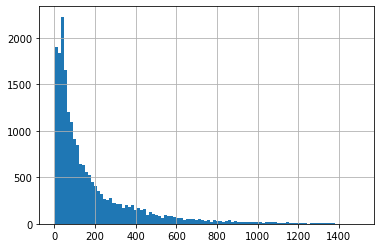

In [62]:
data['days_exposition'].hist(bins=100, range=(1, 1500));

In [63]:
(
    data
    .query('days_exposition !=0')
    ['days_exposition']
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
)

0.0012       3.000
0.0100       4.000
0.5000      95.000
0.9900    1069.000
0.9988    1370.048
Name: days_exposition, dtype: float64

Продажи более 300 дней — уже редки. Больше 600 дней продаются ~ менее 100 объектов. А на участке более 1100 дней гистограмма сливается с нулевым значением.
Примем верхнюю границу в 1100 дней. Это число кажется разумным: дольше квартиры продаются редко + значение 0,99 квантиля 1069 дней.

In [64]:
(
    data
    .loc[data['days_exposition'] >= 1100, 'days_exposition']
    .value_counts()
    .sum()
) / data['days_exposition'].value_counts().sum() * 100

0.6928601605407689

Отсечем продажи > 1100 дней:

In [65]:
data = data.query('days_exposition < 1100')

In [66]:
data['days_exposition'].describe() 

count    23506.000000
mean       149.026546
std        193.520404
min          0.000000
25%         22.000000
50%         72.000000
75%        194.000000
max       1099.000000
Name: days_exposition, dtype: float64

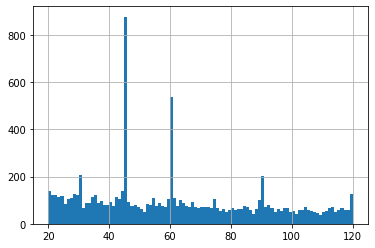

In [67]:
data['days_exposition'].hist(bins=100, range=(20, 120));

Вывод:
* основной пик приходится на значение ~ 45 дней,
* два всплеска около 60  и 90 дней

In [68]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23506 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23506 non-null  int64  
 1   last_price            23506 non-null  float64
 2   total_area            23506 non-null  float64
 3   first_day_exposition  23506 non-null  object 
 4   rooms                 23506 non-null  int64  
 5   ceiling_height        14369 non-null  float64
 6   floors_total          23422 non-null  float64
 7   living_area           21616 non-null  float64
 8   floor                 23506 non-null  int64  
 9   is_apartment          23506 non-null  bool   
 10  studio                23506 non-null  bool   
 11  open_plan             23506 non-null  bool   
 12  kitchen_area          23506 non-null  float64
 13  balcony               23506 non-null  float64
 14  locality_name         23506 non-null  object 
 15  airports_nearest   

10. Жилая площадь в квадратных метрах (м²) `living_area`:

Проверим по каким квартирам(однокомнатная, двухкомнатная и т.д.) не указана жилая площадь:

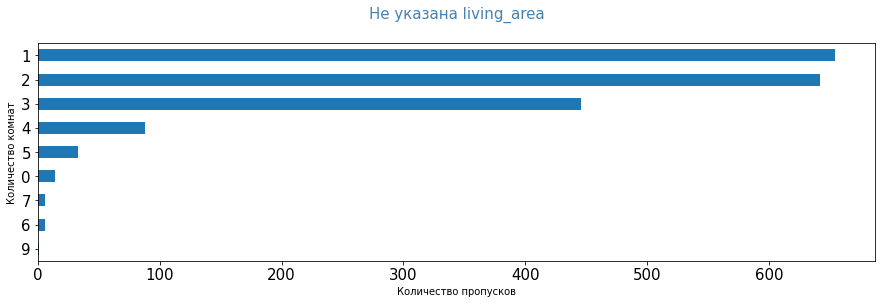

In [69]:
(
    data
    .query('living_area.isna()')
    ['rooms'].value_counts()
    .to_frame()
    .sort_values(by='rooms')
    .plot(kind = 'barh', figsize = (15,4), legend = False, fontsize = 15)
    .set_title('Не указана living_area' + "\n", fontsize = 15, color = 'SteelBlue')
);

plt.ylabel('Количество комнат');
plt.xlabel('Количество пропусков');

В большинстве случаев продавцы не указывали жилую площадь для однокомнатных и двухкомнатных квартир.

In [70]:
data.loc[(data['total_area'] * 0.90) < (data['kitchen_area'] + data['living_area']), 'living_area'] = \
data['total_area'] * 0.90 - data['kitchen_area']

In [71]:
data['living_area'].isna().sum()

1890

Для оставшейся совокупности невозможно рассчитать жилую площадь, т.к. для домов разных лет постойки сильно варьируется размер кухни и жилой площади.\
Например, начисная с ~2010 годов увеличивалась площадь кухни и уменьшалась жилая площадь (появились _евро_ однушки/двушки и т.д. В центре Питера в коммунальных квартирах также маленькие комнаты, но площадь кухни может быть более 20 кв.м.\
Вывод: исключим набор данных из выборки.

In [72]:
#data = data.query('~living_area.isna()')

In [73]:
data['living_area'].isna().sum()

1890

In [74]:
data['living_area'].describe()

count    21616.000000
mean        34.341922
std         21.896621
min          2.000000
25%         18.600000
50%         30.000000
75%         42.200000
max        409.700000
Name: living_area, dtype: float64

In [77]:
data['living_area'].isna().sum()

1890

In [78]:
living_not_nan = (
    data
    .query('~living_area.isna() and living_area < total_area \
    and (living_area + kitchen_area) < total_area')
)

In [79]:
living_area_list = {}
for i in living_not_nan['rooms'].unique():
    living_area_median = living_not_nan.loc[(living_not_nan['rooms'] == i, 'living_area')].median()
    total_area_median = living_not_nan.loc[(living_not_nan['rooms'] == i, 'total_area')].median()
    living_area_avg = living_area_median / (total_area_median * 0.9)
    living_area_list[i] = living_area_avg.round(2)

living_area_list

{3: 0.69,
 1: 0.54,
 2: 0.64,
 4: 0.72,
 5: 0.7,
 6: 0.74,
 0: 0.77,
 11: 0.79,
 7: 0.76,
 8: 0.75,
 14: 0.71,
 10: 0.66,
 15: 0.77,
 9: 0.64,
 19: 0.78,
 12: 0.51}

In [80]:
for room, percent in living_area_list.items():
    data.loc[(data['rooms'] == room) & data['living_area'].isna(), 'living_area'] = data.loc[(data['rooms'] == room) & data['living_area'].isna(), 'total_area'] * percent
    #data['total_area'] * percent

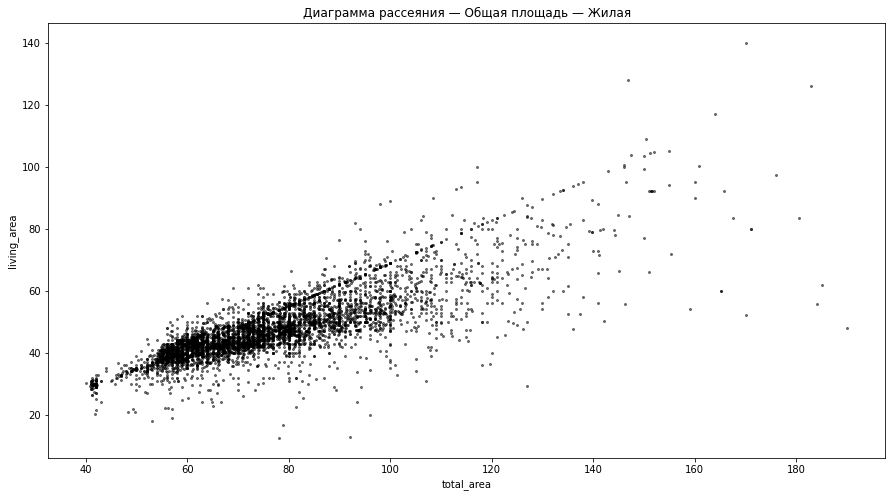

In [82]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='living_area' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'black', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — Жилая');

**Вывод:**\
Заполнение пропусков синтетическими данными во всей красе (почти сплошная прямая линия посередине облака), стоит или изменить алгоритм, или оставить пропуски, или заполнить пропуски маркерами.

Мы пробовали рассчитать living_area:
1) total_area*0.9 - kitchen_area,\
2) рассчитали средний % отношения жилой площади к общей площади в разрезе комнат.\
Результат один и тотже: сплошная прямая линия посередине облака диаграммы рассеяния. После удаления пропущенных значений диаграмма рассеяния стала без явно выделяющихся линий, но исключилась бОльшая часть данных (12%).

Таким образом, необходимо направить запрос разработчикам о причинах пропусков для корректного их заполнения.\
В рамках *учебного Проекта* оставим данные заполненными по средним показателям.

Выполним проверку на корректность значений площадей (выполнение условия):
`total_area` * 90% >= `living_area` + `kitchen_area`

Проверим количество значений, для которых не выполняется условие _total_area * 90% >= (living_area + kitchen_area)_:

In [83]:
data.query('total_area * 0.9 < (living_area + kitchen_area)').shape

(48, 24)

Большинство аномальных значений выявлено у квартир с количеством комнат от 2 до 3.\
Для объектов _студия_ возможна ситуация, при которой жилая и общая площади будут практически равны => не исключаем из анализа студии.\
Для остальных объектов рассчитаем `living_area`

Откорректируем объявления, в которых кухня и жилая площадь занимают более 90% от общей площади квартиры:

In [85]:
data.query('rooms != 0 and ((total_area * 0.9) < (living_area + kitchen_area))')['rooms'].value_counts().sum()

48

Для аномальных объявлений приведем показатели к средним значениям:

In [86]:
for i in data['rooms'].unique():
    data.loc[(data['rooms'] != 0) & ((data['total_area'] * 0.9) < (data['living_area'] + data['kitchen_area'])), 'living_area'] = \
    ((data['total_area'] * 0.9) - data['kitchen_area'])

11. Всего этажей в доме `floors_total`: пропущено 0,36%

Проверим корреляцию этажности здания и расстояния от центра:

In [87]:
data['floors_total'].corr(data['cityCenters_nearest'])

0.09899429142726208

Корреляция слабая + процент незаполненных значений несущественный =>\
исключим записи из общих данных, т.к. они не окажут существенного влияния на анализ данных

In [88]:
data['floors_total'].isna().sum()

84

In [89]:
data.dropna(subset=['floors_total'], inplace=True)

**Вывод**\
Заполнены пропущенные значения там, где это возможно.\
Остались незаполненными данные о расстоянии до аэропорта `airport_meters` по населенным пунктам, в которых во всех объявлениях столбец `airport_nearest` не заполнен. Следовательно, по этим объектам у нас отсутствуют данные для расчета среднего расстояния. Населенные пункты с пропущенными значениями `airport_nearest` относятся к Ленинградской области. Возможно, пользователи не заполняли эти данные в связи с тем, что информция неэффективна и мало важна для покупателей, приобретающих жилье в области.

#### Рассмотрим типы данных в каждом столбце:

- Определим столбцы, в которых нужно изменить тип данных.
- Преобразуем тип данных в выбранных столбцах.

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23422 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23422 non-null  int64  
 1   last_price            23422 non-null  float64
 2   total_area            23422 non-null  float64
 3   first_day_exposition  23422 non-null  object 
 4   rooms                 23422 non-null  int64  
 5   ceiling_height        14361 non-null  float64
 6   floors_total          23422 non-null  float64
 7   living_area           23422 non-null  float64
 8   floor                 23422 non-null  int64  
 9   is_apartment          23422 non-null  bool   
 10  studio                23422 non-null  bool   
 11  open_plan             23422 non-null  bool   
 12  kitchen_area          23422 non-null  float64
 13  balcony               23422 non-null  float64
 14  locality_name         23422 non-null  object 
 15  airports_nearest   

Перечень столбцов, формат которых необходимо изменить на `int`:\
выбраны столбцы, числа в которых не могут иметь дробный вид. Например, количество балконов, этажей - не может являться дробью.

In [91]:
list_columns = {'int': ['balcony', 'last_price', 'floors_total','parks_around3000', 'ponds_around3000']}
format_to_change = pd.DataFrame(data=list_columns)
format_to_change

,int
0,balcony
1,last_price
2,floors_total
3,parks_around3000
4,ponds_around3000


Изменим в исходной таблице `data` формат столбцов на _int_. Столбцы для изменения перечислены в таблице `format_to_change`:

In [92]:
for col in format_to_change['int']:
    data[col] = data[col].astype(int)

Изменим тип столбца `first_day_exposition` на Datatime:

In [93]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Округлим высоту потолков `ceiling_height` до 2 знаков после запятой:

In [94]:
data['ceiling_height'] = round(data['ceiling_height'], 2)

#### Найдем и устраним редкие и выбивающиеся значения

##### Проанализируем данные столбца `ceiling_height`

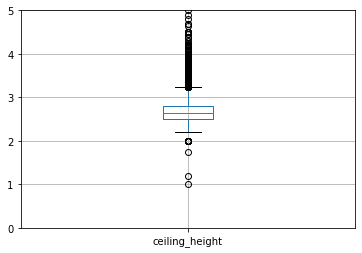

In [95]:
plt.ylim(0, 5)
data.boxplot(column='ceiling_height');

На диаграмме размаха видим, что есть выбросы: 
   - высота потолков превышает 20 метров и в некоторых случаях 100 метров,
   - высота < 2 м

In [96]:
data['ceiling_height'].describe()

count    14361.000000
mean         2.770639
std          1.266842
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Исключим потолки с высотой < 2.2 метров (редкое явление для квартир):

In [97]:
(
    data
    .query('ceiling_height < 2.2')
    ['ceiling_height'].count()
)

14

In [98]:
data = data.query('ceiling_height >= 2.2 or ceiling_height.isna()')

Выведем 20 потолков, высота которых является наибольшей: 

In [99]:
(
    data['ceiling_height']
    .value_counts()
    .reset_index(drop=False)
    .set_index('index')
    .sort_values(by='index', ascending=False)
    .head(15)
)

,ceiling_height
index,
100.0,1
32.0,2
27.5,1
27.0,8
26.0,1
25.0,7
24.0,1
22.6,1
20.0,1


По итогам анализа установлено, что высота потолков аномально высокая.\
Полагаем, что высота потолков ошибочно завышена продавцами в 10 раз. Пример расчета: 25/10 = 2.5 метров.\
Если высота квартиры превышает 20 метров, уменьшим значение в 10 раз.

In [100]:
for index, value in data['ceiling_height'].items():
    if value >= 22:
        data.loc[index, 'ceiling_height'] = value / 10

Оставшиеся аномалии:\
   - потолок < 2.2 метров\
**+**
   - пропущенные значения

In [101]:
data['ceiling_height'].describe()

count    14347.000000
mean         2.730438
std          0.349328
min          2.200000
25%          2.510000
50%          2.650000
75%          2.800000
max         20.000000
Name: ceiling_height, dtype: float64

Рассчитаем медиану высоты потолка в зависимости от:
* населенного пункта,
* количества комнат в квартире
* расстояния от центра г. Спб

In [102]:
#ceiling_avg = data.pivot_table(index=["rooms", "city_name"], values='ceiling_height', aggfunc='median').reset_index()
#ceiling_avg.columns=['rooms', 'city_name', 'ceiling_avg']
#ceiling_avg

Рассчитаем высоту потолков для квартир, расположенных не в Санкт-Петербурге, медианное значение будем считать для каждого населенного пункта:

In [103]:
for i in data['city_name'].unique():
    if i != 'Санкт-Петербург':
        data.loc[data['ceiling_height'].isna() & (data['city_name'] == i), 'ceiling_height'] = \
        data.loc[~data['ceiling_height'].isna() & (data['city_name'] == i), 'ceiling_height'].median()

Рассчитаем высоту потолков для квартир, расположенных до 10 км от центра Спб, медианное значение будем считать для каждого населенного пункта:

In [104]:
for i in data['city_name'].unique():
    if i == 'Санкт-Петербург':
        data.loc[data['ceiling_height'].isna() & (data['cityCenters_nearest'] < 10000) & (data['city_name'] == i), 'ceiling_height'] = \
        data.loc[~data['ceiling_height'].isna() & (data['cityCenters_nearest'] < 10000) & (data['city_name'] == i), 'ceiling_height'].median()

Рассчитаем высоту потолков для квартир, расположенных более 10 км от центра Спб, медианное значение будем считать для каждого населенного пункта:

In [105]:
for i in data['city_name'].unique():
    if i == 'Санкт-Петербург':
        data.loc[data['ceiling_height'].isna() & (data['cityCenters_nearest'] > 10000) & (data['city_name'] == i), 'ceiling_height'] = \
        data.loc[~data['ceiling_height'].isna() & (data['cityCenters_nearest'] > 10000) & (data['city_name'] == i), 'ceiling_height'].median()

Проверим, остались ли пустые значения:

In [106]:
(
    data
    .query('ceiling_height.isna()')
    ['city_name'].value_counts()
    .head()
)

Кобринское    6
Селезнёво     5
Усть-Луга     5
Заклинье      3
Аро           3
Name: city_name, dtype: int64

Пустые значения остались для квартир, расположенных в отдаленных населенных пунктах + ни в одном из объявлений по данным локациям не указана высота потолка.\
Для таких значений возмем медиану высоты потолка для квартир, расположенных в Лен.области.

In [107]:
for i in data['city_name'].unique():
    data.loc[data['ceiling_height'].isna() & (data['city_name'] == i), 'ceiling_height'] = \
    data.loc[~data['ceiling_height'].isna() & (data['cityCenters_nearest'] == 0), 'ceiling_height'].median()

In [108]:
data['ceiling_height'].isna().sum()

0

In [109]:
data['ceiling_height'].describe()

count    23408.000000
mean         2.711358
std          0.294381
min          2.200000
25%          2.550000
50%          2.600000
75%          2.770000
max         20.000000
Name: ceiling_height, dtype: float64

_Вывод:_
Высота потолков заполнена исходя из районности:\
в современных районах Питера высота потолков будет ожидаема ниже, чем в исторических.

**Вывод**
Значения столбца `ceiling_height` откорректированы.\
Для объявлений, в которых не указана информация о высоте потолков:
- проставлены медианные значения в зависимости от населенного пункта и отдаленности от центра Спб,
- если в рамках одного населенного пункта во всех объявлениях не указана высота потолков, то\
    медианное значение рассчитавалось по всем объектам Лен.области без привязки к определенному населенному пункту.

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23408 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23408 non-null  int64         
 1   last_price            23408 non-null  int64         
 2   total_area            23408 non-null  float64       
 3   first_day_exposition  23408 non-null  datetime64[ns]
 4   rooms                 23408 non-null  int64         
 5   ceiling_height        23408 non-null  float64       
 6   floors_total          23408 non-null  int64         
 7   living_area           23408 non-null  float64       
 8   floor                 23408 non-null  int64         
 9   is_apartment          23408 non-null  bool          
 10  studio                23408 non-null  bool          
 11  open_plan             23408 non-null  bool          
 12  kitchen_area          23408 non-null  float64       
 13  balcony         

##### Выявление аномальных значений в столбцах

Сформируем список `column_list` столбцов таблицы `data`:

In [111]:
column_list = data.columns
column_list

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'city_name', 'airport_meters'],
      dtype='object')

Отберем столбцы, в которых хотим проверить наличие аномальных значений:

In [112]:
column_list = ['total_area', 'ceiling_height', 'floors_total', 'living_area', 'floor', 'kitchen_area', 'balcony']

Для каждого выбранного столбца сформируем диаграммы размаха и проанализируем выбросы. Если природа аномалии не будет ясна, то удалим редкие и выбивающиеся значения.

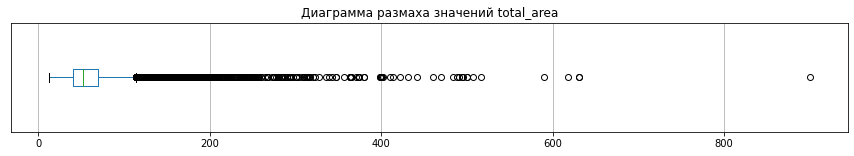

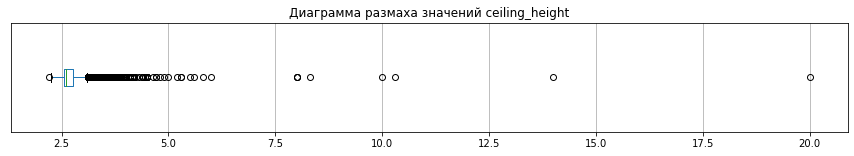

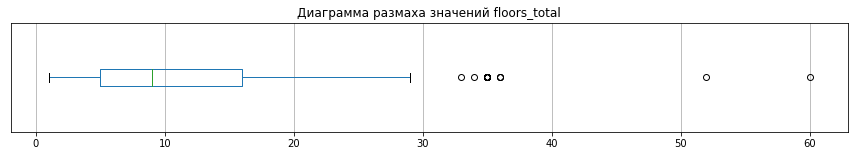

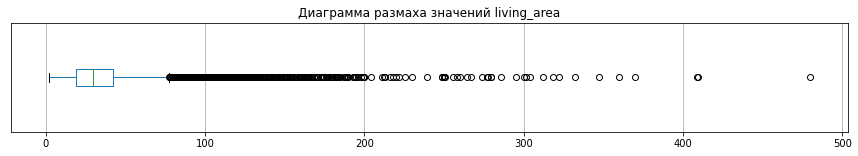

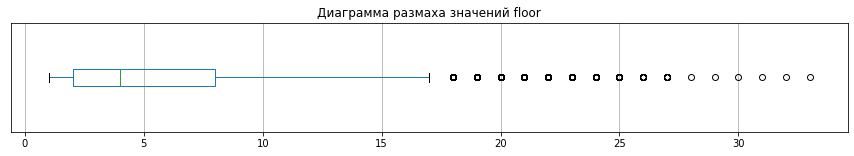

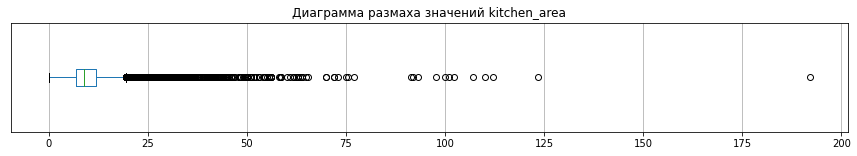

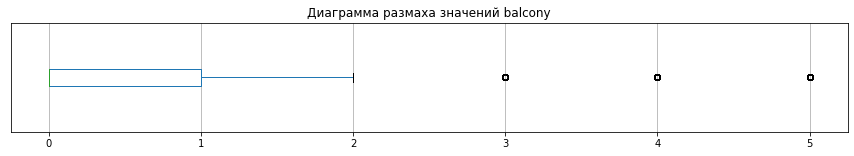

In [113]:
for col in column_list:
    fig, ax = plt.subplots(figsize = (15,2))
    ax = data[[col]].boxplot(vert = False, ax =ax)
    ax.set_title(f'Диаграмма размаха значений {col}')
    y_axis = ax.axes.get_yaxis()
    y_axis.set_visible(False)

1) Общая площадь квартиры в квадратных метрах (м²) `total_area` и количество комнтат в квартире `rooms`.\
На графике видны выбросы - общая площадь квартиры > 200 кв.м.\
Квартиры с площадью > 200 кв.м. продаются редко и нетипичны для стандартного типа застройки.\
Исключим квартиры с площадью > 200 кв.м.

В большинстве случаев > 7 комнат в коммунальных квартирах. Коммунальные квартиры продаются реже (зачастую собственники не могут договориться между собой о продаже) и дольше, чем другие варианты на рынке, по следующим причинам:\
- большое количество собственников-продавцов,
- плохое состояние объекта,
- длительность оформления сделки купли-продажи.

Вывод: Исключим данные объекты из анализа.

In [116]:
(
    data.
    query('rooms >= 7')
    ['rooms'].count()
)

88

In [117]:
data = data.query('rooms < 7')

Площадь квартир > 200 кв.м. является нетипичной для 1-6 комнатных квартир. Проверим сколько объектов удовлетворяют критерию > 200 кв.м.:

In [118]:
data.pivot_table(index='rooms', values='total_area', aggfunc=['max', 'min', 'mean', 'median'])

,max,min,mean,median
,total_area,total_area,total_area,total_area
rooms,,,,
0,371.0,15.5,29.321701,26.075
1,494.1,12.0,37.656302,36.600
2,196.0,20.0,55.772284,53.000
3,363.1,40.1,77.624786,72.600
4,500.0,42.0,107.213848,98.610
5,507.0,40.0,160.993956,145.200
6,500.0,87.0,204.354412,188.050


In [119]:
(
    data
    .query('total_area > 200')
    ['rooms'].count()
)

156

Исключим объектs, удовлетворяющиt критерию `площадь >= 200 кв.м.`

In [120]:
data = data.loc[data['total_area'] <= 200]

In [121]:
data['total_area'].describe()

count    23164.000000
mean        57.952052
std         26.203086
min         12.000000
25%         40.000000
50%         51.500000
75%         68.500000
max        200.000000
Name: total_area, dtype: float64

Вывод: иключены выбросы, данные стали более понятны и реалистичны.

2) Высота потолков (м) `ceiling_height`

В старом фонде Спб высота потолков может достигать 3,9 м. Посчитаем количество объектов с высотой потолков > 3.9 м:

In [122]:
(
    data
    .query('ceiling_height > 3.9')
    .pivot_table(index=["rooms"],  values='last_price', aggfunc='count', margins= True , margins_name='Sum')
    .reset_index()
    .sort_values(by='last_price', ascending=False)
)

,rooms,last_price
7,Sum,82
3,3,28
2,2,25
1,1,15
4,4,9
5,5,3
0,0,1
6,6,1


Исключим объекты, удовлетворяющие критерию высота потолков > 3.9 м:

In [123]:
data = data.query('ceiling_height <= 3.9')

In [124]:
data['ceiling_height'] = round(data['ceiling_height'], 2)

In [125]:
data['ceiling_height'].describe()

count    23082.000000
mean         2.698219
std          0.215130
min          2.200000
25%          2.550000
50%          2.600000
75%          2.750000
max          3.900000
Name: ceiling_height, dtype: float64

Вывод: исключены объекты с выбивающимися значениями.

3) Всего этажей в доме `floors_total` и этаж `floors`

<AxesSubplot:>

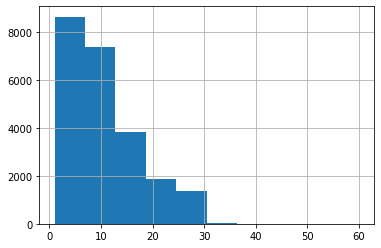

In [126]:
data['floors_total'].hist()

Исключим значения > 30 этажей:

In [127]:
data = data.loc[data['floors_total'] < 30]

In [128]:
data['floors_total'].describe()

count    23051.000000
mean        10.706911
std          6.541017
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

Вывод: выбивающиеся значения удалены

4) Жилая площадь в квадратных метрах (м²) `living_area`

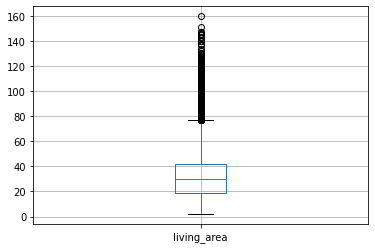

In [129]:
data['living_area'].plot(kind='box', grid=True);

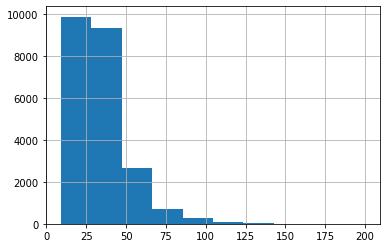

In [130]:
data['living_area'].hist(bins=10, range=(9,200));

In [131]:
(
    data[['total_area', 'living_area', 'kitchen_area']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,total_area,living_area,kitchen_area
0.0012,20.00,9.07,0.00
0.01,25.30,13.00,1.70
0.5,51.40,30.00,9.00
0.99,158.00,97.00,32.55
0.9988,190.00,126.00,51.82


In [132]:
(
    data
    .query('living_area < 14')
    ['rooms'].value_counts().sum()
)

351

Учетная норма жилого помещения на 1 человека 9 кв.м. [Закон Санкт-Петербурга от 19 июля 2005 г. N 407-65)](https://base.garant.ru/7948784/5ac206a89ea76855804609cd950fcaf7/)

In [133]:
data = data.query('living_area >= 9 and living_area <= 100')

In [134]:
data['living_area'].describe()

count    22841.000000
mean        32.743595
std         15.783342
min          9.000000
25%         18.800000
50%         30.000000
75%         42.000000
max        100.000000
Name: living_area, dtype: float64

Вывод: исключены выбросы, значения приближены к адекватным.

5) Площадь кухни в квадратных метрах (м²) `kitchen_area`

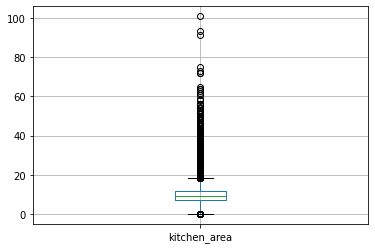

In [135]:
data['kitchen_area'].plot(kind='box', grid=True);

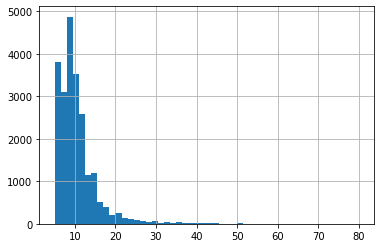

In [136]:
data['kitchen_area'].hist(bins=50, range=(5,80));

In [137]:
data['kitchen_area'].describe()

count    22841.000000
mean        10.199719
std          5.397870
min          0.000000
25%          7.000000
50%          9.000000
75%         11.600000
max        100.900000
Name: kitchen_area, dtype: float64

In [138]:
(
    data[['rooms', 'total_area', 'living_area', 'kitchen_area', 'balcony']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,living_area,kitchen_area,balcony
0.0012,0.00,20.00,10.00,0.00,0.00
0.01,1.00,25.49,13.00,1.70,0.00
0.5,2.00,51.00,30.00,9.00,0.00
0.99,4.00,141.36,85.46,32.06,5.00
0.9988,5.00,180.00,98.00,51.47,5.00


Исключаем объекты с площадью кухни > 35 кв.м.

In [139]:
data = data.query('kitchen_area <= 35 or rooms == 0')

In [140]:
data['kitchen_area'].describe()

count    22670.000000
mean         9.938404
std          4.402208
min          0.000000
25%          7.000000
50%          9.000000
75%         11.500000
max         35.000000
Name: kitchen_area, dtype: float64

Вывод: площадь кухни < 5 кв.м. адекватна для студий, для остальных объектов нормальная площадь кухни <= 20 кв.м.

6) Количество балконов `balcony`

<AxesSubplot:ylabel='Frequency'>

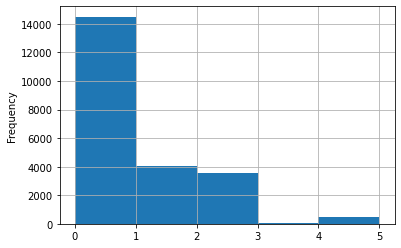

In [141]:
data['balcony'].plot(kind='hist', grid=True, bins=5)

Исключим количество балконов равное 5:

In [142]:
data.query('balcony <= 3')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,city_name,airport_meters
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.000,8,False,...,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,0.0,Санкт-Петербург,18863.0
1,7,3350000,40.40,2018-12-04,1,2.62,11,18.600,1,False,...,посёлок Шушары,12817.0,18603.0,0,0.0,0,0.0,81.0,Шушары,12817.0
2,10,5196000,56.00,2015-08-20,2,2.60,5,34.300,4,False,...,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,Санкт-Петербург,21741.0
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.400,5,False,...,городской посёлок Янино-1,NaN,0.0,0,0.0,0,0.0,55.0,Янино-1,NaN
6,6,3700000,37.30,2017-11-02,1,2.62,26,10.600,6,False,...,посёлок Парголово,52996.0,19143.0,0,0.0,0,0.0,155.0,Парголово,52996.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.81,2017-03-21,3,3.70,5,73.300,3,False,...,Санкт-Петербург,24665.0,4232.0,1,796.0,3,381.0,0.0,Санкт-Петербург,24665.0
23695,14,3100000,59.00,2018-01-15,3,2.50,5,38.000,4,False,...,Тосно,NaN,0.0,0,0.0,0,0.0,45.0,Тосно,NaN
23696,18,2500000,56.70,2018-02-11,2,2.60,3,29.700,1,False,...,село Рождествено,NaN,0.0,0,0.0,0,0.0,0.0,Рождествено,NaN
23697,13,11475000,76.75,2017-03-28,2,3.00,17,45.775,12,False,...,Санкт-Петербург,39140.0,10364.0,2,173.0,3,196.0,602.0,Санкт-Петербург,39140.0


In [143]:
data['balcony'].describe()

count    22670.000000
mean         0.598456
std          0.959402
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

7) Цена `last_price`

<AxesSubplot:ylabel='Frequency'>

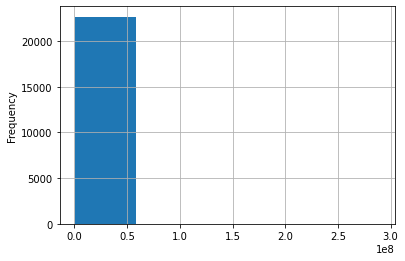

In [144]:
data['last_price'].plot(kind='hist', grid=True, bins=5)

In [145]:
data = data.query('last_price <= 55000000')

**Вывод:**\
Нами обработаны все аномалии в столбцах таблицы `data`. В случае если природа аномалии понятна (например, площадь кухни студий или высота потолков), то данные были восстановлены или оставлено корректное значение.  В ином случае редкие и выбивающиеся значения были удалены (например, количество комнат, балконов).

#### check gap

In [146]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22648 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22648 non-null  int64         
 1   last_price            22648 non-null  int64         
 2   total_area            22648 non-null  float64       
 3   first_day_exposition  22648 non-null  datetime64[ns]
 4   rooms                 22648 non-null  int64         
 5   ceiling_height        22648 non-null  float64       
 6   floors_total          22648 non-null  int64         
 7   living_area           22648 non-null  float64       
 8   floor                 22648 non-null  int64         
 9   is_apartment          22648 non-null  bool          
 10  studio                22648 non-null  bool          
 11  open_plan             22648 non-null  bool          
 12  kitchen_area          22648 non-null  float64       
 13  balcony         

In [155]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,0.00,20.00,2.40,0.00,"567,646.00",10.00,0.00,1.00,2.00
0.01,1.00,25.41,2.50,0.00,"1,000,000.00",13.00,1.60,1.00,2.00
0.5,2.00,51.00,2.60,72.00,"4,550,000.00",30.00,9.00,4.00,9.00
0.99,4.00,135.30,3.50,900.00,"22,500,000.00",84.50,27.00,22.00,26.00
0.9988,5.00,173.65,3.80,"1,077.00","40,000,000.00",98.00,34.08,26.00,27.00


In [156]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    df_check[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.0012,0.00,20.00,2.30,3.00,"562,188.00",10.00,3.77,1.00,2.00
0.01,1.00,25.20,2.50,4.00,"1,000,000.00",13.00,5.00,1.00,2.00
0.5,2.00,52.00,2.65,95.00,"4,650,000.00",30.00,9.10,4.00,9.00
0.99,5.00,197.21,3.83,"1,068.66","36,000,000.00",120.00,35.09,23.00,26.00
0.9988,8.00,380.00,25.00,"1,369.90","124,772,448.00",219.69,60.00,26.00,35.00


### Посчитайте и добавьте в таблицу новые столбцы

#### Cтолбец - цена одного квадратного метра `price_per_meter`

In [157]:
data['price_per_meter'] = data['last_price'] / data['total_area']

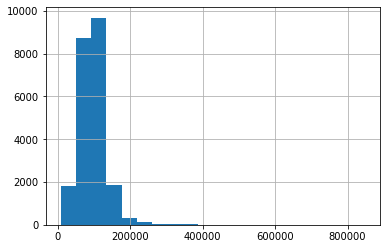

In [158]:
data['price_per_meter'].hist(bins=20);

Округлим значение до 2х знаков после запятой:

In [159]:
data = data.round({'price_per_meter': 2})

#### Столбец - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее) `week_day`

In [160]:
data['day_exposition'] = data['first_day_exposition'].dt.day_name ()

#### Столбец - месяц публикации объявления `month`

In [161]:
data['month_exposition'] = data['first_day_exposition'].dt.month_name()

#### Столбец - год публикации объявления `year_exposition`

In [162]:
data['year_exposition'] = data['first_day_exposition'].dt.year

#### Столбец - тип этажа квартиры (значения — «‎первый», «последний», «другой»)

In [163]:
def floor_type(row):
    
    floor = row['floor']
    floors_total = row['floors_total']
    
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif floor <= 0:
        return 'ошибка'
    elif 1 < floor < floors_total:
        return 'другой'

In [164]:
data['floor_type'] = data.apply(floor_type, axis=1)

#### Столбец - расстояние до центра города в километрах (переведите из м в км и округлите до целых значений) `cityCenters_km`

In [165]:
data['cityCenters_km'] = (data['cityCenters_nearest'] / 1000).astype(int)

In [166]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,city_name,airport_meters,price_per_meter,day_exposition,month_exposition,year_exposition,floor_type,cityCenters_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,755.0,0.0,Санкт-Петербург,18863.0,120370.37,Thursday,March,2019,другой,16
1,7,3350000,40.40,2018-12-04,1,2.62,11,18.60,1,False,...,0.0,81.0,Шушары,12817.0,82920.79,Tuesday,December,2018,первый,18
2,10,5196000,56.00,2015-08-20,2,2.60,5,34.30,4,False,...,574.0,558.0,Санкт-Петербург,21741.0,92785.71,Thursday,August,2015,другой,13
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,0.0,55.0,Янино-1,NaN,95065.79,Monday,September,2018,другой,0
6,6,3700000,37.30,2017-11-02,1,2.62,26,10.60,6,False,...,0.0,155.0,Парголово,52996.0,99195.71,Thursday,November,2017,другой,19
7,5,7915000,71.60,2019-04-18,2,2.60,24,45.54,22,False,...,0.0,0.0,Санкт-Петербург,23982.0,110544.69,Thursday,April,2019,другой,11
8,20,2900000,33.16,2018-05-23,1,2.70,27,15.43,26,False,...,0.0,189.0,Мурино,51553.0,87454.76,Wednesday,May,2018,другой,0
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0.0,289.0,Санкт-Петербург,50898.0,88524.59,Sunday,February,2017,другой,15
10,5,5050000,39.60,2017-11-16,1,2.67,12,20.30,3,False,...,553.0,137.0,Санкт-Петербург,38357.0,127525.25,Thursday,November,2017,другой,13
11,9,3300000,44.00,2018-08-27,2,2.54,5,31.00,4,False,...,0.0,7.0,Ломоносов,48252.0,75000.00,Monday,August,2018,другой,51


### Проведите исследовательский анализ данных

#### Общая площадь

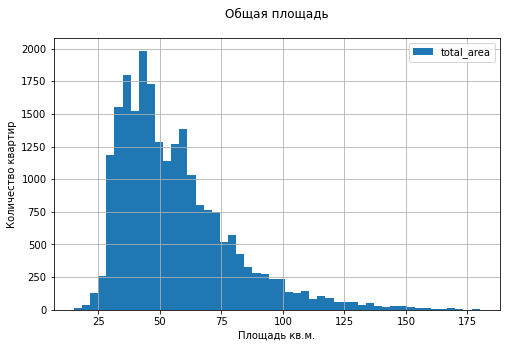

In [167]:
data.plot(y = 'total_area', kind = 'hist', bins = 50, range = (15,180), figsize = (8,5), grid=True, 
          title='Общая площадь\n');

plt.xlabel("Площадь кв.м.");
plt.ylabel("Количество квартир");

Гистограмма имеет нормальное распределение. На графике виден высокий пик около 45 кв.м.=> чаще продают квартиры, метраж которых составляет ~45 кв.м. Стоит отметить второй по величине всплеск около 35 кв.м.\
Минимальная площадь колеблится в районе 20 кв.м. - студии, случаи продажи студий более редкие. Отметим, что реже продают и квартиры с большой площадью - логично, т.к. с ростом количества членов семьи возникает желание увеличить площадь проживания.

#### Жилая площадь

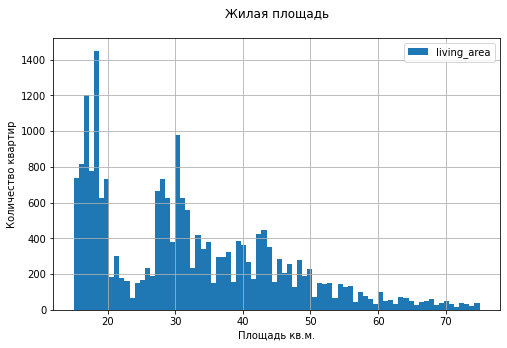

In [168]:
data.plot(y = 'living_area', kind = 'hist', bins = 80, range = (15,75), 
          figsize = (8,5), grid=True, title='Жилая площадь\n');

plt.xlabel("Площадь кв.м.");
plt.ylabel("Количество квартир");

Высокий пик приходится на квартиры с жилой площадью ~ 18 кв.м., второй пик - около 30 кв.м. Сопоставимо с общей площадью, которая наиболее часто встречается в объявлениях о продаже (~ 35, 45 кв.м.). На графике прослеживаются выраженные пики около 50 кв.м., что соответствует пику на гистограмме _Общая площадь_ по объявлениям с общей площадью ~65кв.м.

#### Площадь кухни

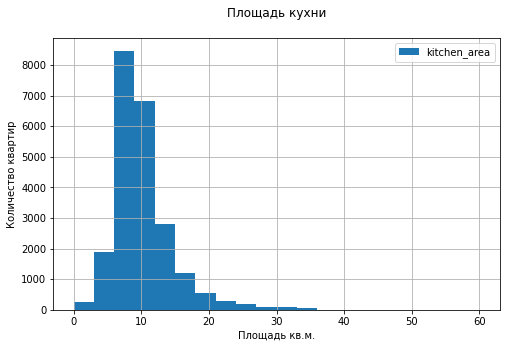

In [169]:
data.plot(y = 'kitchen_area', kind = 'hist', bins = 20, range = (0,60), figsize = (8,5), grid=True, 
          title='Площадь кухни\n');

plt.xlabel("Площадь кв.м.");
plt.ylabel("Количество квартир");

Гистограмма имеет нормальное распределение. Наиболее распространенный метраж кухни ~9 кв.м. Видны незначительные всплески ~15 кв.м., объяснимо, т.к. квартиры с площадью ~60 кв.м. также имеют выше среднего количество размещенных объявлений о продаже.

#### Цена объекта

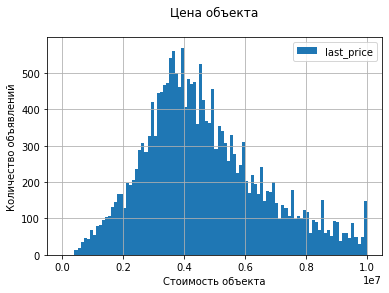

In [170]:
data.plot(y = 'last_price', kind = 'hist', bins = 100, range = (0,10000000), grid=True,
         title='Цена объекта\n');

plt.xlabel("Стоимость объекта");
plt.ylabel("Количество объявлений");

Наиболее вероятная цена продажи квартиры ~4 млн руб. Соответствует популярной площади продажи квартир ~40 кв.м. Менее вероятная продажа квартир по цене > 10 млн руб., а также квартир с экстремально низкой стоимостью < 2.5 млн руб. Данный факт объясним, т.к. продажа квартир ниже рынка обусловлена вероятными проблемами со стороны продавца(обременения, оформление как дарение, отсутствие согласия о продаже от всех собственников и пр.) => чем выше риски, тем ниже стоимость объекта.

#### Количество комнат

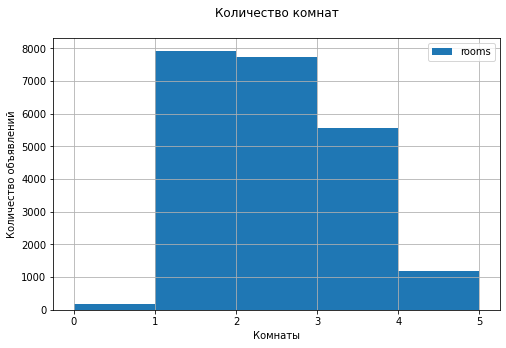

In [171]:
data.plot(y = 'rooms', kind = 'hist', bins = 5, range = (0,5), figsize = (8,5), grid=True,
         title='Количество комнат\n');

plt.xlabel("Комнаты");
plt.ylabel("Количество объявлений");

Пик графика приходится на продажу однокомнатдных и двухкомнатных квартир. Данный факт может быть объясним:\
наиболее часто стоимость 1-2 комнатных квартир входит в диапазон цен часто встречающихся при заключении сделок, т.е. стоимость этих квартир чаще соответтвует покупательской способности.

#### Высота потолков

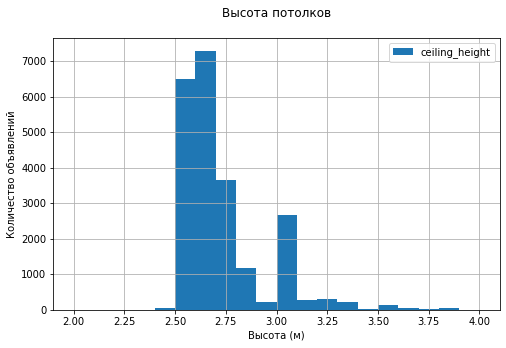

In [172]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 20, range = (2,4), figsize = (8,5), grid=True,
         title='Высота потолков\n');

plt.xlabel("Высота (м)");
plt.ylabel("Количество объявлений");

Высокий пик приходится на квартиры с высотой потолков ~ 2.6 м. Крайне редко встречается высота потолка > 2.75 м. Заметен всплеск квартир с высотой пололка ~3 м - вероятнее всего это квартиры, расположенные рядом с центром Спб.

#### Этаж квартиры

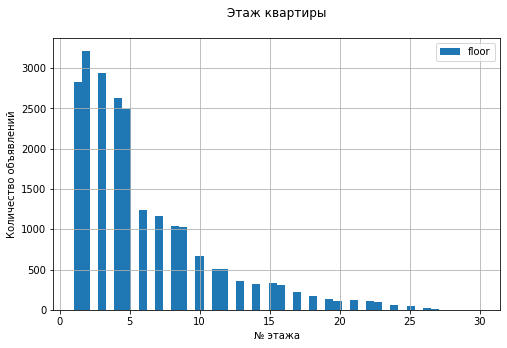

In [173]:
data.plot(y = 'floor', kind = 'hist', bins = 50, range = (1,30), figsize = (8,5), grid=True,
         title='Этаж квартиры\n');

plt.xlabel("№ этажа");
plt.ylabel("Количество объявлений");

Наиболее часто продают квартиры на 2-3 этажах, реже продаются квартиры, расположенные выше 10 этажа. Следует отметить всплески в районе 1 и 4-5 этажей. Большое количество квартир на 1 этаже продаются из-за минусов проживания на первом этаже (сырость, живность, шум на улице и пр.).

#### Тип этажа квартиры («первый», «последний», «другой»)

<AxesSubplot:xlabel='floor_type'>

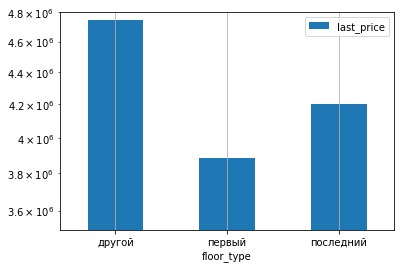

In [174]:
(
    data
    .groupby('floor_type')['last_price'].median()
    .reset_index()
    .plot.bar(x='floor_type', y='last_price', rot=0, logy=True, ylim=(3500000, 4800000), grid=True)
)

Квартиры, расположенные на 1 этаже - самые дешевые, наибольшая стоимость у квартир, расположенных между первым и последним этажами.

#### Общее количество этажей в доме

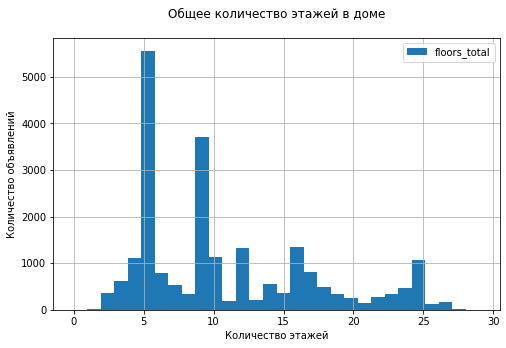

In [175]:
data.plot(y = 'floors_total', kind = 'hist', bins = 30, range = (0,29), figsize = (8,5), grid=True,
          title='Общее количество этажей в доме\n');

plt.xlabel("Количество этажей");
plt.ylabel("Количество объявлений");

Пик приходится на дома с 5ю и 9ю этажами. 

#### Расстояние до центра города в метрах

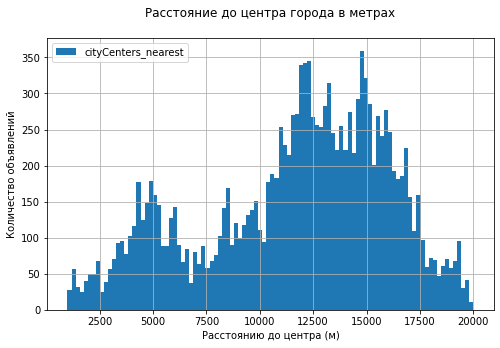

In [176]:
data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 100, range = (1000,20000), figsize = (8,5), grid=True,
          title='Расстояние до центра города в метрах\n');

plt.xlabel("Расстоянию до центра (м)");
plt.ylabel("Количество объявлений");

На гистограмме отображены пиковые значения у 12 и 15 км. На расстоянии < 2 км от центра количество объявлений о продаже < 50. Данный факт свидетельствует о том, что квартиры в центре Спб продаются реже.\
Расстояние до центра не указано для населенных пунктов Лен.области - не учитывали на гистограмме.
Для объектов Лен.области мало востребована информация о расстоянии до центра и аэропорта. В большенстве случаев покупатели приобретают жилье загородом вдали от аэропортов и трасс для отдыха от городкой суеты.[более подробное исследование](#cityCenters_nearest)

#### Расстояние до ближайшего аэропорта

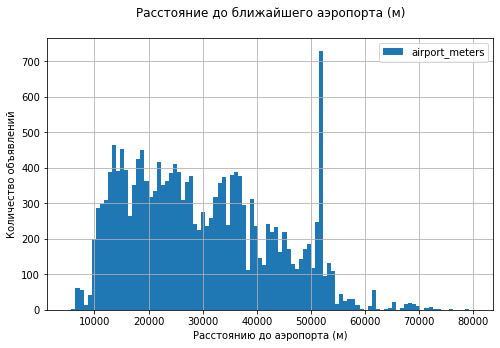

In [177]:
data.plot(y = 'airport_meters', kind = 'hist', bins = 100, range = (5000,80000), figsize = (8,5), grid=True,
        title='Расстояние до ближайшего аэропорта (м)\n');

plt.xlabel("Расстоянию до аэропорта (м)");
plt.ylabel("Количество объявлений");

Большинство квартир расположено на расстоянии от 15-25 км до аэропорта. Пик приходится на квартиры, расположенные ~ 53 км от аэропорта.
Расстояния менее 5 км до аэропорта отсутствуют, что соответствует действительности, [более подробное исследование и корректировка данных по столбцу `airports_nearest`](#airports_nearest).

#### Расстояние до ближайшего парка

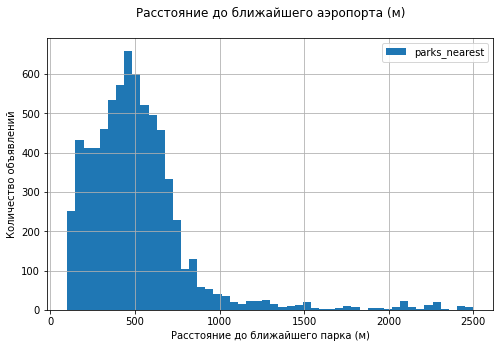

In [178]:
data.plot(y = 'parks_nearest', kind = 'hist', bins = 50, range = (100,2500), figsize = (8,5), grid=True,
          title='Расстояние до ближайшего аэропорта (м)\n');

plt.xlabel("Расстояние до ближайшего парка (м)");
plt.ylabel("Количество объявлений");

Гистограмма имеет нормальное распределение. Большинство квартир расположено ~ 500 м от парков. Следует отметить, если квартира находится в Лен.области или расстояние до парка превышает 3000 метров, покупатели не заполняли столбец `parks_nearest`.\
Информация о расстоянии до парка актуальна, если парк находится в пешей доступности. Более 3км идти до парка затратно по времени ~ 30 мин в одну сторону. С высокой вероятностью можно утвержать, что не каждый человек готов тратить 30 мин на дорогу до парка.

#### День и месяц публикации объявления

Вспомогательная таблица для выстраивания дней недели в хронологическом порядке:

In [179]:
week = pd.Series(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Sunday'])
week = pd.DataFrame(week)
week.columns=['day_exposition']
week

,day_exposition
0,Monday
1,Tuesday
2,Wednesday
3,Thursday
4,Friday
5,Saturday
6,Sunday


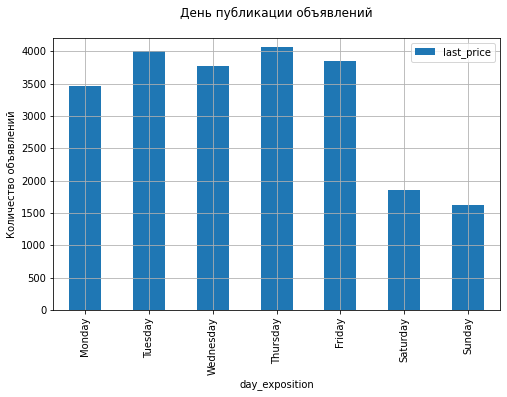

In [180]:
(
    data
    .groupby('day_exposition')['last_price'].count()
    .reset_index()
    .merge(week, how='right')
    .plot.bar(x='day_exposition', y='last_price', ylim=(0, 4200), grid=True, figsize = (8,5),
             title='День публикации объявлений\n', ylabel='Количество объявлений')
);

Больше всего объявлений публикуют в четверг, вторник. Количество публикаций одинаково в среду и пятницу.

Вспомогательная таблица для выстраивания месяцев в хронологическом порядке

In [181]:
month = pd.Series(['January', 'February', 'March', 'April', 'May', 'June','July',
                   'August', 'September', 'October', 'November', 'December'])
month = pd.DataFrame(month)
month.columns=['month_exposition']
month

,month_exposition
0,January
1,February
2,March
3,April
4,May
5,June
6,July
7,August
8,September
9,October


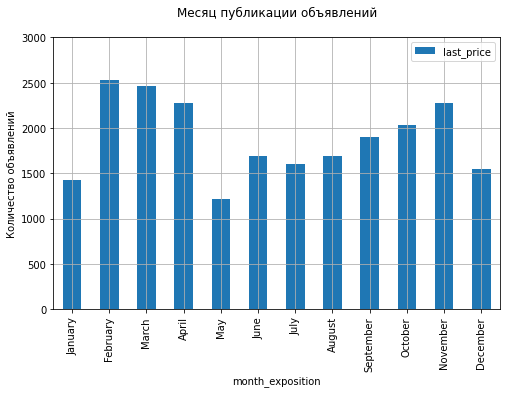

In [182]:
(
    data
    .groupby('month_exposition')['last_price'].count()
    .reset_index()
    .merge(month, how='right')
    .plot.bar(x='month_exposition', y='last_price', ylim=(0, 3000), grid=True, figsize = (8,5),
             title='Месяц публикации объявлений\n', ylabel='Количество объявлений')
);

Больше всего объявлений публикуют в феврале-апреле - восстановление после новогодних праздников. Несущественная разница в количестве публикаций летом (июнь-август) - отпуск.

### Скорость продажи квартир `days_exposition`:

Построим гистограмму для анализа количества дней продажи квартир:

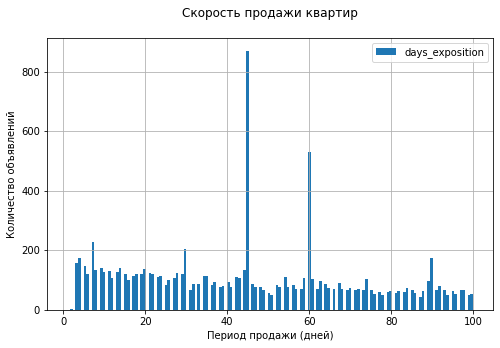

In [183]:
(
    data
    .query('days_exposition != 0')
    .plot(y = 'days_exposition', kind = 'hist', bins = 150, range = (1,100), figsize = (8,5), grid=True,
          title='Скорость продажи квартир\n')
)
plt.xlabel("Период продажи (дней)");
plt.ylabel("Количество объявлений");

На графике отчетливо видны три всплеска:
* 45 дней
* 60 дней
* 90 дней

Согласно правилам сайта Яндекс.Недвижимость срок публикация объявлений о продаже квартир составляет:\
 - квартиры до 4,5 млн — 45 дней,
 - квартиры от 4,5 до 10 млн — 60 дней,
 - квартиры от 10 млн — 90 дней.
 
 Исключим данные объявления из анализа скорости продаж.

Количество объявлений, которые необходимо удалить:

* 45 дней до 4,5 млн руб.:

In [184]:
data.query('days_exposition == 45 and last_price < 4500000')['last_price'].count().sum()

0

Объявления, соответствующие критерию `квартиры до 4,5 млн — 45 дней` - отсутсвтуют.

Количество записей, удовлетворяющих критерию `квартиры от 4,5 до 10 млн — 60 дней`:

In [185]:
data.query('days_exposition == 60 and last_price > 4500000 and last_price < 10000000')['rooms'].count().sum()

466

Количество записей, удовлетворяющих критерию `квартиры от 10 млн — 90 дней`:

In [186]:
data.query('days_exposition == 90 and last_price > 10000000')['rooms'].count().sum()

0

Вывод: Необходимо исключить из анализа 458 записей, удовлетворяющих критерию: `квартиры от 4,5 до 10 млн — 60 дней`

In [187]:
data_days_exposition = data.query('days_exposition != 60 and days_exposition != 0')

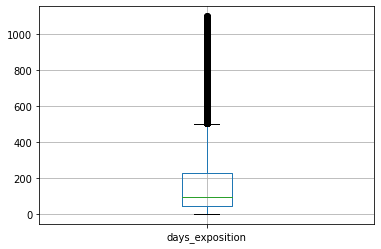

In [188]:
data_days_exposition['days_exposition'].plot(kind='box', grid=True);

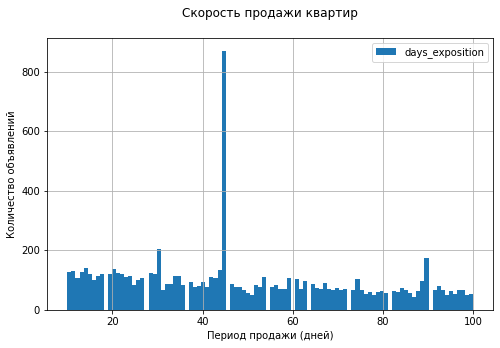

In [189]:
data_days_exposition.plot(y = 'days_exposition', kind = 'hist', bins = 100, range = (10,100), figsize = (8,5), grid=True,
          title='Скорость продажи квартир\n');

plt.xlabel("Период продажи (дней)");
plt.ylabel("Количество объявлений");

In [190]:
(
    data
    .query('days_exposition != 60 and days_exposition != 0')
    [['days_exposition', 'total_area', 'living_area', 'kitchen_area']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,days_exposition,total_area,living_area,kitchen_area
0.0012,3.00,20.00,10.00,0.00
0.01,4.00,25.00,13.00,1.01
0.5,97.00,50.00,29.50,9.00
0.99,929.26,133.00,83.08,26.00
0.9988,"1,079.00",177.02,97.30,34.00


In [191]:
data_days_exposition['days_exposition'].describe()

count    19159.00000
mean       172.77123
std        197.87251
min          1.00000
25%         43.00000
50%         97.00000
75%        227.00000
max       1099.00000
Name: days_exposition, dtype: float64

Чаще всего квартиры продаются в течение ~ 45 дней с момента размещения объявления. В анализируемых данных отсутствуют объявления `квартиры до 4,5 млн — 45 дней` - т.е. удовлетворяющие критериям срока публикации Я.Недвижиомсть.\
Быстрыми считаются продажи ~ 40 дней, все продажи более 230 дней  можно считать долгими.

Медианное значение 97 дней, среднее количество дней продажи - 200 дней.

### Факторы, оказывающее наибольшее влияние на общую (полную) стоимость объекта

#### Изучим зависимость цены от общей площади `total_area`

In [193]:
data['last_price'].corr(data['total_area'])

0.7365324981234649

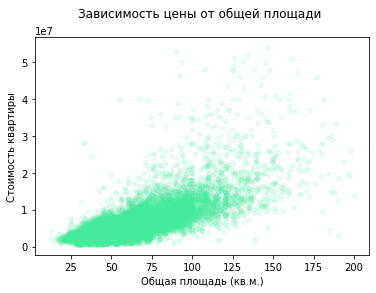

In [194]:
(
    data
    #.pivot_table(index='total_area', values='last_price')
    #.reset_index()
    .plot(x='total_area', y='last_price', kind='scatter', alpha=0.1, c = '#44eb9d',
          title='Зависимость цены от общей площади \n')
);

plt.xlabel("Общая площадь (кв.м.)");
plt.ylabel("Стоимость квартиры");

Коррелиция положительная => чем выше общая площадь квартиры, тем выше стоимость. Данную взаимосвязь можно объяснить:\
стоимость квартир рассчитывается исходя из цены за 1 кв.м.=> больше площадь объекты - больше цена.\
Отметим, если общая площадь квартиры превышает 130 кв.м., то взаимосвязь слабеет, т.е. на графике видим объекты с большой площадью, но ценой в диапазоне объектов с площадью ниже.

#### Изучим зависимость цены от жилой площади `living_area` и площади кухни `kitchen_area`

In [195]:
col_for_corr=['living_area', 'kitchen_area']

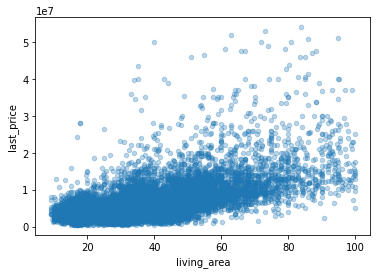

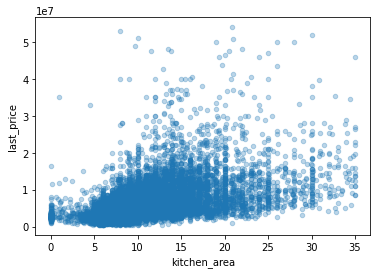

In [196]:
for i in col_for_corr:
    (
        data
        #.pivot_table(index=i, values='last_price')
        #.reset_index()
        .plot(x=i, y='last_price', kind='scatter', alpha=0.3)
    )

Корреляция цены от площади кухни плолжительная, связь есть, но не слишком сильная.

In [197]:
data['last_price'].corr(data['kitchen_area'])

0.5307176241799267

Отчетливо видно, что в центре графика более темное пятно.\
В данной структуре данных можно заметить, что объекты, у которых площадь кухни находится в диапазоне от 7.5 до 12.5 метров наблюдается четкая взамосвязь площади кухни и стоимости квартиры. 

In [198]:
data['last_price'].corr(data['living_area'])

0.6302191489624615

Корреляция цены от жилой площади положительная и сильнее корреляции от площади кухни. На графике более четко видна взаимосвязь жилой площади от 15 кв.м. до 50 кв.м. и стоимости объекта.

#### Изучим зависимость цены от количества комнат, этажа и даты размещения объявления

In [199]:
list_for_corr = ['rooms', 'floor_type', 'day_exposition', 'month_exposition', 'year_exposition']

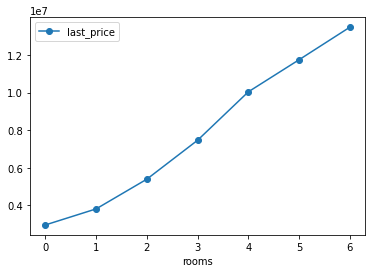

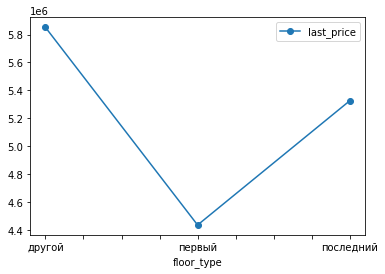

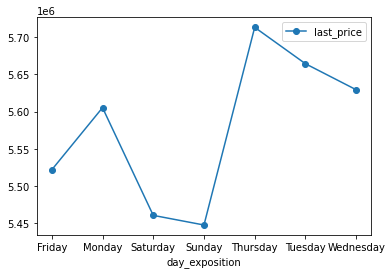

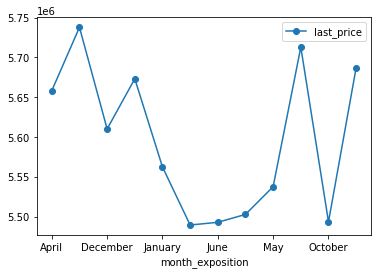

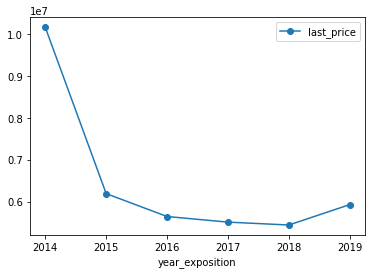

In [200]:
for i in list_for_corr:
    (
        data
        .pivot_table(index=i, values='last_price')
        .reset_index()
        .plot(y='last_price', x=i, style='o-')
    )

Сравним в разрезе лет изменение:
* количество объявлений о продаже квартир,
* общая площадь продаваемых объектов.

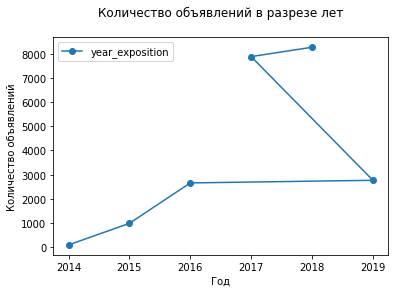

In [201]:
(
    data['year_exposition']
    .value_counts()
    .reset_index()
    .plot(y='year_exposition', x='index', style='o-', title='Количество объявлений в разрезе лет\n')
);

plt.xlabel("Год");
plt.ylabel("Количество объявлений");

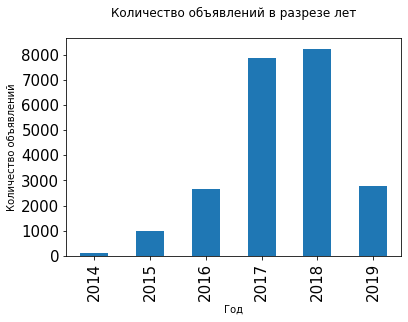

In [202]:
(
    data
    .pivot_table(index='year_exposition', values='last_price', aggfunc='count')
    .reset_index()
    .plot(kind = 'bar', figsize = (6,4), legend = False, fontsize = 15, x='year_exposition', title='Количество объявлений в разрезе лет\n')
)
plt.xlabel("Год");
plt.ylabel("Количество объявлений");

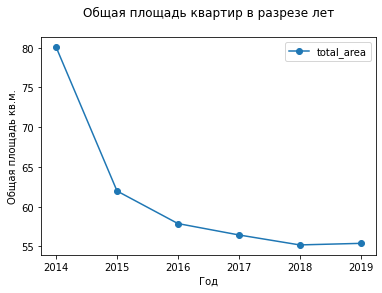

In [204]:
(
    data
    .pivot_table(index='year_exposition', values='total_area', aggfunc='mean')
    .reset_index()
    .plot(y='total_area', x=i, style='o-', title='Общая площадь квартир в разрезе лет\n')
);

plt.xlabel("Год");
plt.ylabel("Общая площадь кв.м.");

1) **Количество комнат**:\
Наблюдается сильная положительная корреляция между количеством комнат и стоимосью квартиры. Данный факт соответствует ранее выявленной корреляции общей площади и стоимости квартиры:\
чем больше площадь, тем дороже квартира. В большинстве случаев площадь взаимосвязана с количеством комнат в квартире.\
2) **Расположение квартиры (этаж)**:\
Самыми дешевыми являются квартиры, расположенные на первом этаже, дороже можно продать квартиры, расположенные не на первом и не на последнем этажах.\
3) **День недели размещения объявления**:\
Самая высокая стоимость у объявлений, размещенных в понедельник, среду и четверг. Самая низкая цена у объявлений, размещенных в пятницу - воскресенье. Вероятно, при размещении объявлений продавцы завышают стоимость квартир, надеясь на высокий спрос и желая получить наибольшую выручку. Полагаем, что в течение рабочих дней продавцы наблюдают за активностью покупателей (изучают рынок), к концу недели снижают стоимость для увеличения запросов на просмотр и желанием сократить период продажи.\
4) **Месяц размещеня объявления**:\
Наибольшая стоимость у объявлений, выложенных в 4 квартале (конец года). К концу года остаются варианты, которые не смогли продать в течение года, вероятная причина - завышенная цена продажи.Самые дешевые квартиры в мае - июне.\
5) **Год размещения объявления**:\
В 2014 году были введены первые санкции в отношении России, в этот год был отмечен резкий рост доллара. В связи с этими событиями вырос спрос на вторичное жилье, что привело к росту его стоимости. В последующих годах рынок недвижимости адаптировался и цены стали постепенно снижаться.\

В рамках проведенного доп.анализа установлено:
* 2014 г. - наименьшее количество объявлений, но самая большая площадь продаваемых объектов.
* 2018 г. - обратная ситуация, объявлений много, но за счет маленькой площади квартир - низкая стоимость продажи


### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

10 населенных пунктов с наибольшим числом объявлений:

In [205]:
rate_city_name = (
    data['city_name'].value_counts()
    .head(10)
)


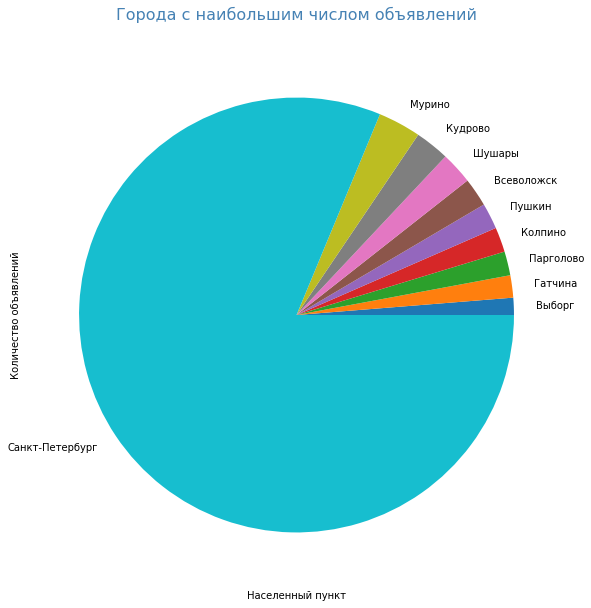

In [206]:
(
    rate_city_name
    .sort_values(ascending=True)
    .plot(kind = 'pie', figsize = (20,10), rot = -5, legend = False, fontsize = 10)
    .set_title('Города с наибольшим числом объявлений' + "\n", fontsize = 16, color = 'SteelBlue')  
);

plt.xlabel("Населенный пункт");
plt.ylabel("Количество объявлений");


 Населённые пункты с самой высокой стоимостью квадратного метра:
   - Санкт-Петербург,
   - Пушкин,
   - Парголово
 
 Населённые пункты с самой низкой стоимостью квадратного метра:
   - Гатчина,
   - Всеволожск,
   - Выборг
Полагаем, что низкая цена обусловлена дальностью нахождения от Санкт-Петербурга (значтельное время на поездку до работы Спб и обратно).

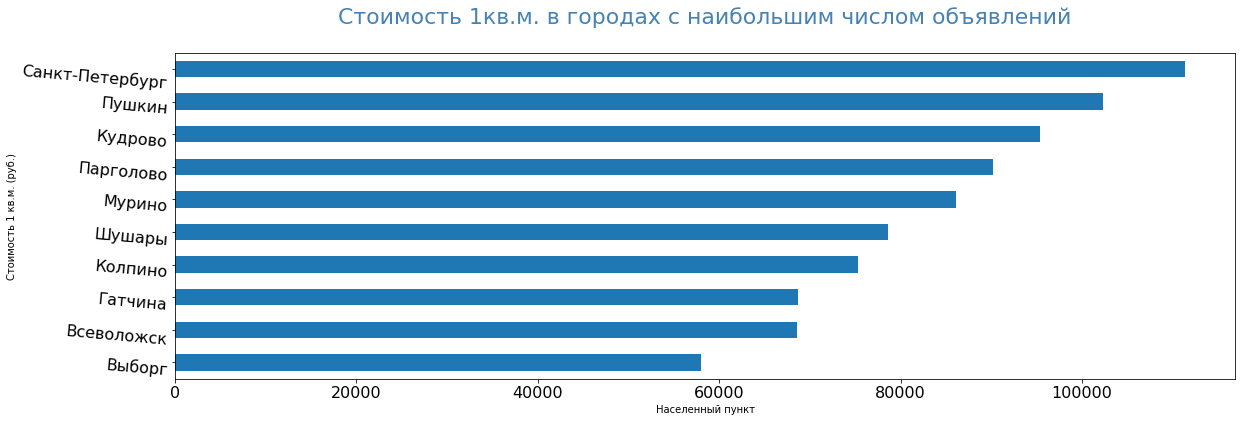

In [207]:
(
    data
    .query('city_name in @rate_city_name.index')
    .pivot_table(index='city_name', values='price_per_meter', aggfunc='mean')
    ['price_per_meter'].astype(int)
    .sort_values(ascending=True)
    .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
    .set_title('Стоимость 1кв.м. в городах с наибольшим числом объявлений' + "\n", fontsize = 22, color = 'SteelBlue')  
);

plt.xlabel("Населенный пункт");
plt.ylabel("Стоимость 1 кв.м. (руб.)");

### Выделите квартиры в Санкт-Петербурге и вычислите среднюю цену каждого километра до центра. 

На стоимость квартир в Спб существенно влияет близость к центру. Начиная с ~ 10 км от центра и дальше, стоимость стабильно снижается.

>При удалении от центра на 3 и 5 км наблюдается спад стоимости квартиры по причине возрастания доли квартир на последнем и первом этажах.

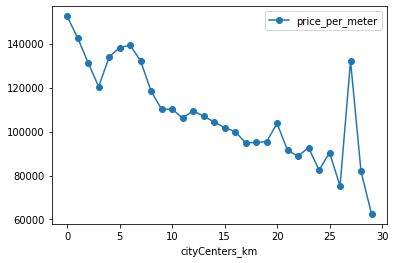

In [208]:
(
    data
    .query('city_name == "Санкт-Петербург"')
    .pivot_table(index='cityCenters_km', values='price_per_meter')
    .reset_index()
    .plot(y='price_per_meter', x='cityCenters_km', style='o-')
);

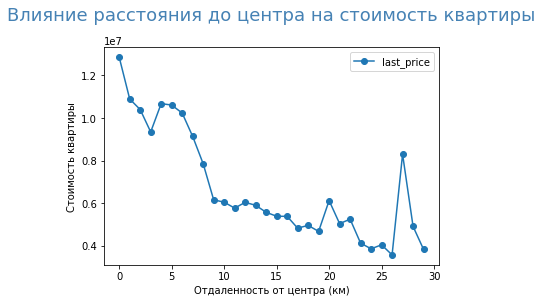

In [209]:
(
    data
    .query('city_name == "Санкт-Петербург"')
    .pivot_table(index='cityCenters_km', values='last_price')
    .reset_index()
    .plot(y='last_price', x='cityCenters_km', style='o-')
    .set_title('Влияние расстояния до центра на стоимость квартиры' + "\n", fontsize = 18, color = 'SteelBlue')
);

plt.xlabel("Отдаленность от центра (км)");
plt.ylabel("Стоимость квартиры");

Доля квартир, расположенных на первом и последнем этажах в 3х и 5и км от центра Спб:

In [210]:
def get_stats_by_floortype(city, floor):
    j = data.query(f'city_name == "{city}"')
    j = j[['floor_type', 'cityCenters_km', 'rooms']]
    j = j.pivot_table(index=['floor_type', 'cityCenters_km'], values='rooms', aggfunc='count').reset_index()
    for f_type in j['floor_type'].unique():
        j.loc[j['floor_type'] == f_type, 'rooms_all'] = j.loc[j['floor_type'] == f_type, 'rooms'].sum()
    j['rooms_all'] = j['rooms_all'].astype('int')
    j = j.query(f'cityCenters_km == {floor}')[['floor_type', 'rooms', 'rooms_all']].reset_index(drop=True)
    j = j.rename(columns={'rooms': f'rooms_{floor}km'})
    j['%'] = round(j[f'rooms_{floor}km'] / j['rooms_all'] * 100, 1)
    print(j.sort_values(by='%', ascending=False))
    
get_stats_by_floortype('Санкт-Петербург', 3)
print()
get_stats_by_floortype('Санкт-Петербург', 5)

  floor_type  rooms_3km  rooms_all    %
2  последний         93       1742  5.3
1     первый         70       1539  4.5
0     другой        286      11526  2.5

  floor_type  rooms_5km  rooms_all    %
2  последний         94       1742  5.4
1     первый         71       1539  4.6
0     другой        488      11526  4.2


In [211]:
# способы группировки и сортировки информации

(
    data
     .query('city_name == "Санкт-Петербург"')
     .query('3 <= cityCenters_km <=5 ')
     .groupby(['cityCenters_km', 'floor_type'])['last_price']
     .agg(['count', 'mean'])
     .style.format("{:,.0f}")
)

### Общий вывод

 - в период 2016-2018 гг. наблюдалась стабильная ситуцация на рынке недвижимости (низкое колебание цен), в 2019 г. прослеживается рост цены за кв.м. по сравнению с прошлыми периодами. 
 - в среднем период продажи квартиры занимает ~ 65 дней. 
 - одни из самых дорогих квартиры, расположенные в Санкт-Петербурге и Пушкине. 
 - квартиры, расположенные < 10 от центра Спб, имеют наибольшую стоимость + наблюдается положительная корреляция: чем ближе к центру - дороже кв.м. Есть два спада на уровне 3 км от центра и 5 км от центра - это обусловлено тем, что на данном растоянии большую долю занимаюь квартиры, расположенные и на 1 и последнем этажах. Категорий квартир с более дешевой стоимостью намного больше на 3-м километре, чем на пятом, что является одной из причин падения и пика.
 - на стоимость влияет этаж, на котором расположена квартира: цена ниже, если квартиры расположены на первом или последнем этаже. 
 - чаще всего прдают однокомнатные и двухкомнатные квартиры. 
 - к концу года остаются самые дорогие варианты квартир. 

In [212]:
# check
import seaborn as sns
import matplotlib.pyplot as plt

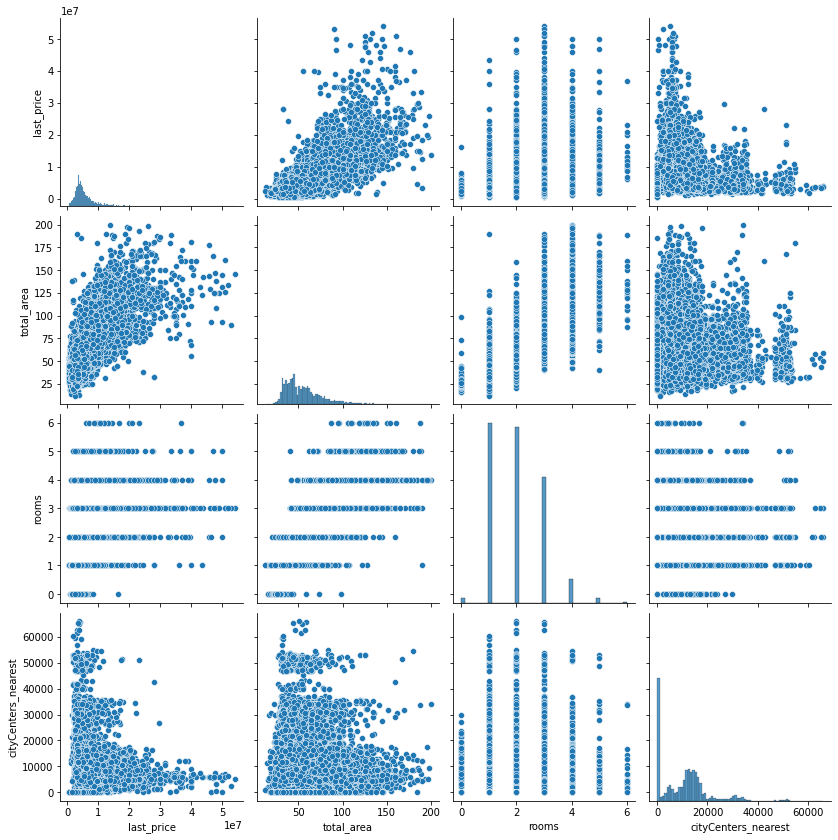

In [213]:
# check
sns.pairplot(data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']])
plt.gcf().set_size_inches(12,12);


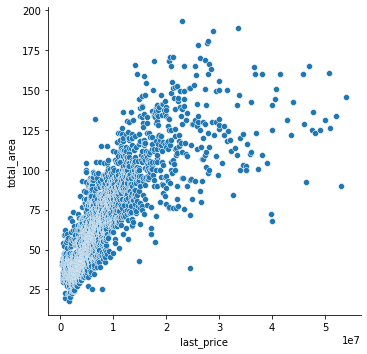

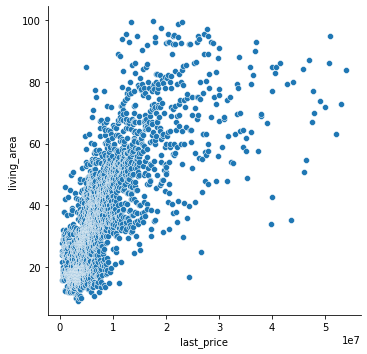

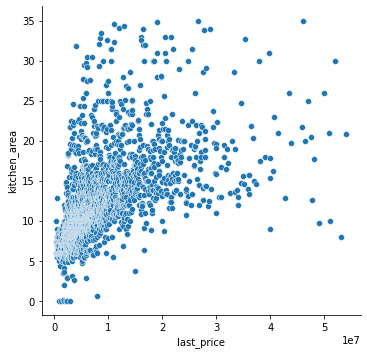

In [215]:
# check
price_pivot_area = data.pivot_table(index='last_price', values=([
    'total_area', 'living_area', 'kitchen_area']), aggfunc='median')
price_pivot_area = price_pivot_area.reset_index()
# Посмотрим на диаграммы рассеяния для столбцов 'total_area', 'living_area', 'kitchen_area'.
for row in ['total_area', 'living_area', 'kitchen_area']:
    sns.relplot(data=price_pivot_area, x='last_price', y=row, kind='scatter')

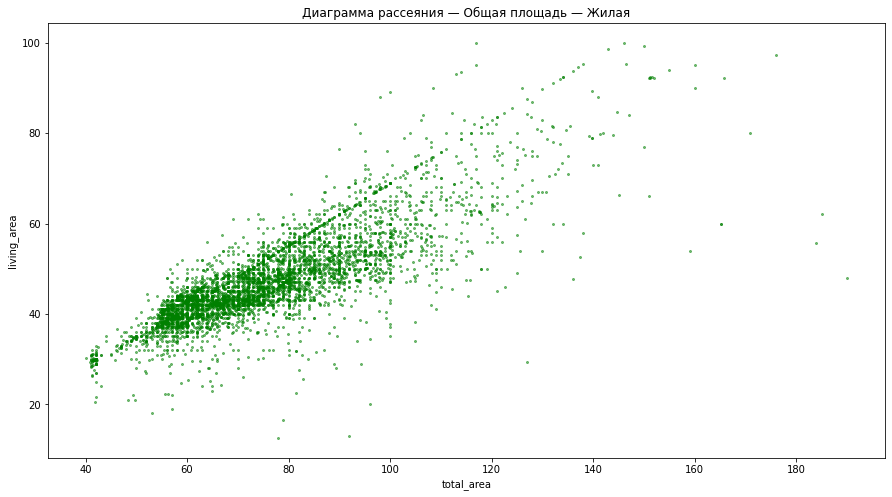

In [216]:
# check
data[data['rooms'] == 3].query('total_area < 201 and last_price < 25_000_000').plot(kind='scatter',
        y='living_area' , x='total_area', alpha=0.5, subplots=True, figsize=(15,8), c = 'g', s = 4)
plt.title('Диаграмма рассеяния — Общая площадь — Жилая');

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод